# Importing Libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pandas.plotting import scatter_matrix
warnings.filterwarnings('ignore')

# Data Overview


## About Dataset

# **Nigerian Traffic Crashes (2020-2024)**

## **Overview:**

This dataset offers a detailed examination of road traffic crashes in Nigeria, covering the period from Q4 2020 to Q1 2024. It includes quarterly data on the total number of crashes, injuries, fatalities, and vehicles involved, along with key contributing factors such as speed violations, driving under the influence, and poor weather conditions. The data is sourced from official traffic records and provides insights into the factors influencing road safety in Nigeria.

## **Features:**

### **Quarter**

* **Description** : The quarter in which the data is recorded (e.g., Q4 2020, Q1 2021). This field serves as the temporal reference for the dataset.

### **State**

* **Description** : The Nigerian state where the traffic crashes occurred. This variable allows for regional analysis of crash data.

### **Total Crashes**

* **Description** : The total number of road traffic crashes reported per quarter for each state.

### **Number Injured**

* **Description** : The total number of individuals injured in road traffic crashes per quarter. This metric indicates the severity of the crashes.

### **Number Killed**

* **Description** : The total number of fatalities resulting from road traffic crashes per quarter.

### **Total Vehicles Involved**

* **Description** : The total number of vehicles involved in the crashes per quarter. This variable can be used to analyze traffic volume and crash rates.

### **Speed Violation (SPV)**

* **Description** : The number of crashes attributed to speed violations. This factor is critical in understanding the role of speeding in road traffic crashes.

### **Driving Under Alcohol/Drug Influence (DAD)**

* **Description** : The number of crashes where driving under the influence of alcohol or drugs was a contributing factor.

### **Poor Weather (PWR)**

* **Description** : The number of crashes that occurred under poor weather conditions, providing insights into weather-related risks.

### **Fatigue (FTQ)**

* **Description** : The number of crashes attributed to driver fatigue. This variable highlights the impact of driver alertness on road safety.

This dataset is ideal for researchers, policymakers, and traffic safety analysts interested in exploring the dynamics of road traffic crashes in Nigeria, assessing risk factors, and developing data-driven strategies for improving road safety.


# Reading Datasets

In [48]:
df = pd.read_csv('Nigerian_Road_Traffic_Crashes_2020_2024.csv')

## 1. Exploratory Data Analytics (EDA)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Quarter                  518 non-null    object
 1   State                    518 non-null    object
 2   Total_Crashes            518 non-null    int64 
 3   Num_Injured              518 non-null    int64 
 4   Num_Killed               518 non-null    int64 
 5   Total_Vehicles_Involved  518 non-null    int64 
 6   SPV                      518 non-null    int64 
 7   DAD                      518 non-null    int64 
 8   PWR                      518 non-null    int64 
 9   FTQ                      518 non-null    int64 
 10  Other_Factors            518 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 44.6+ KB


In [50]:
df.head()

,Quarter,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors
0,Q4 2020,Abia,30,146,31,37,19,0,0,0,18
1,Q4 2020,Adamawa,77,234,36,94,57,0,0,0,37
2,Q4 2020,Akwa Ibom,22,28,7,24,15,0,0,1,8
3,Q4 2020,Anambra,72,152,20,83,43,1,0,0,39
4,Q4 2020,Bauchi,154,685,90,140,74,0,0,0,66


In [51]:
df.tail()

,Quarter,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors
513,Q1 2024,Rivers,15,32,4,21,17,0,0,0,4
514,Q1 2024,Sokoto,24,122,41,52,41,0,0,0,11
515,Q1 2024,Taraba,38,98,17,38,17,0,0,0,21
516,Q1 2024,Yobe,39,234,13,55,38,0,0,0,17
517,Q1 2024,Zamfara,13,61,14,16,14,0,0,0,2


We want to get more specific information, therefore I will break down the quarter feature into Quarter and Year with separate columns

In [52]:
df['Quartal'] = df.Quarter.str.split().str.get(0)
df['Year'] = df.Quarter.str.split().str.get(1).astype(int)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Quarter                  518 non-null    object
 1   State                    518 non-null    object
 2   Total_Crashes            518 non-null    int64 
 3   Num_Injured              518 non-null    int64 
 4   Num_Killed               518 non-null    int64 
 5   Total_Vehicles_Involved  518 non-null    int64 
 6   SPV                      518 non-null    int64 
 7   DAD                      518 non-null    int64 
 8   PWR                      518 non-null    int64 
 9   FTQ                      518 non-null    int64 
 10  Other_Factors            518 non-null    int64 
 11  Quartal                  518 non-null    object
 12  Year                     518 non-null    int32 
dtypes: int32(1), int64(9), object(3)
memory usage: 50.7+ KB


In [54]:
df.head()

,Quarter,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors,Quartal,Year
0,Q4 2020,Abia,30,146,31,37,19,0,0,0,18,Q4,2020
1,Q4 2020,Adamawa,77,234,36,94,57,0,0,0,37,Q4,2020
2,Q4 2020,Akwa Ibom,22,28,7,24,15,0,0,1,8,Q4,2020
3,Q4 2020,Anambra,72,152,20,83,43,1,0,0,39,Q4,2020
4,Q4 2020,Bauchi,154,685,90,140,74,0,0,0,66,Q4,2020


In [55]:
df.drop('Quarter',axis=1,inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   State                    518 non-null    object
 1   Total_Crashes            518 non-null    int64 
 2   Num_Injured              518 non-null    int64 
 3   Num_Killed               518 non-null    int64 
 4   Total_Vehicles_Involved  518 non-null    int64 
 5   SPV                      518 non-null    int64 
 6   DAD                      518 non-null    int64 
 7   PWR                      518 non-null    int64 
 8   FTQ                      518 non-null    int64 
 9   Other_Factors            518 non-null    int64 
 10  Quartal                  518 non-null    object
 11  Year                     518 non-null    int32 
dtypes: int32(1), int64(9), object(2)
memory usage: 46.7+ KB


In [57]:
df.head()

,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors,Quartal,Year
0,Abia,30,146,31,37,19,0,0,0,18,Q4,2020
1,Adamawa,77,234,36,94,57,0,0,0,37,Q4,2020
2,Akwa Ibom,22,28,7,24,15,0,0,1,8,Q4,2020
3,Anambra,72,152,20,83,43,1,0,0,39,Q4,2020
4,Bauchi,154,685,90,140,74,0,0,0,66,Q4,2020


In [58]:
df.isnull().sum()

State                      0
Total_Crashes              0
Num_Injured                0
Num_Killed                 0
Total_Vehicles_Involved    0
SPV                        0
DAD                        0
PWR                        0
FTQ                        0
Other_Factors              0
Quartal                    0
Year                       0
dtype: int64

In [59]:
df.isna().sum()

State                      0
Total_Crashes              0
Num_Injured                0
Num_Killed                 0
Total_Vehicles_Involved    0
SPV                        0
DAD                        0
PWR                        0
FTQ                        0
Other_Factors              0
Quartal                    0
Year                       0
dtype: int64

In [60]:
df.duplicated().sum()

0

In [61]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['State', 'Quartal']
Numerical Variables:
['Total_Crashes', 'Num_Injured', 'Num_Killed', 'Total_Vehicles_Involved', 'SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors', 'Year']


Total_Crashes
Skew : 2.06


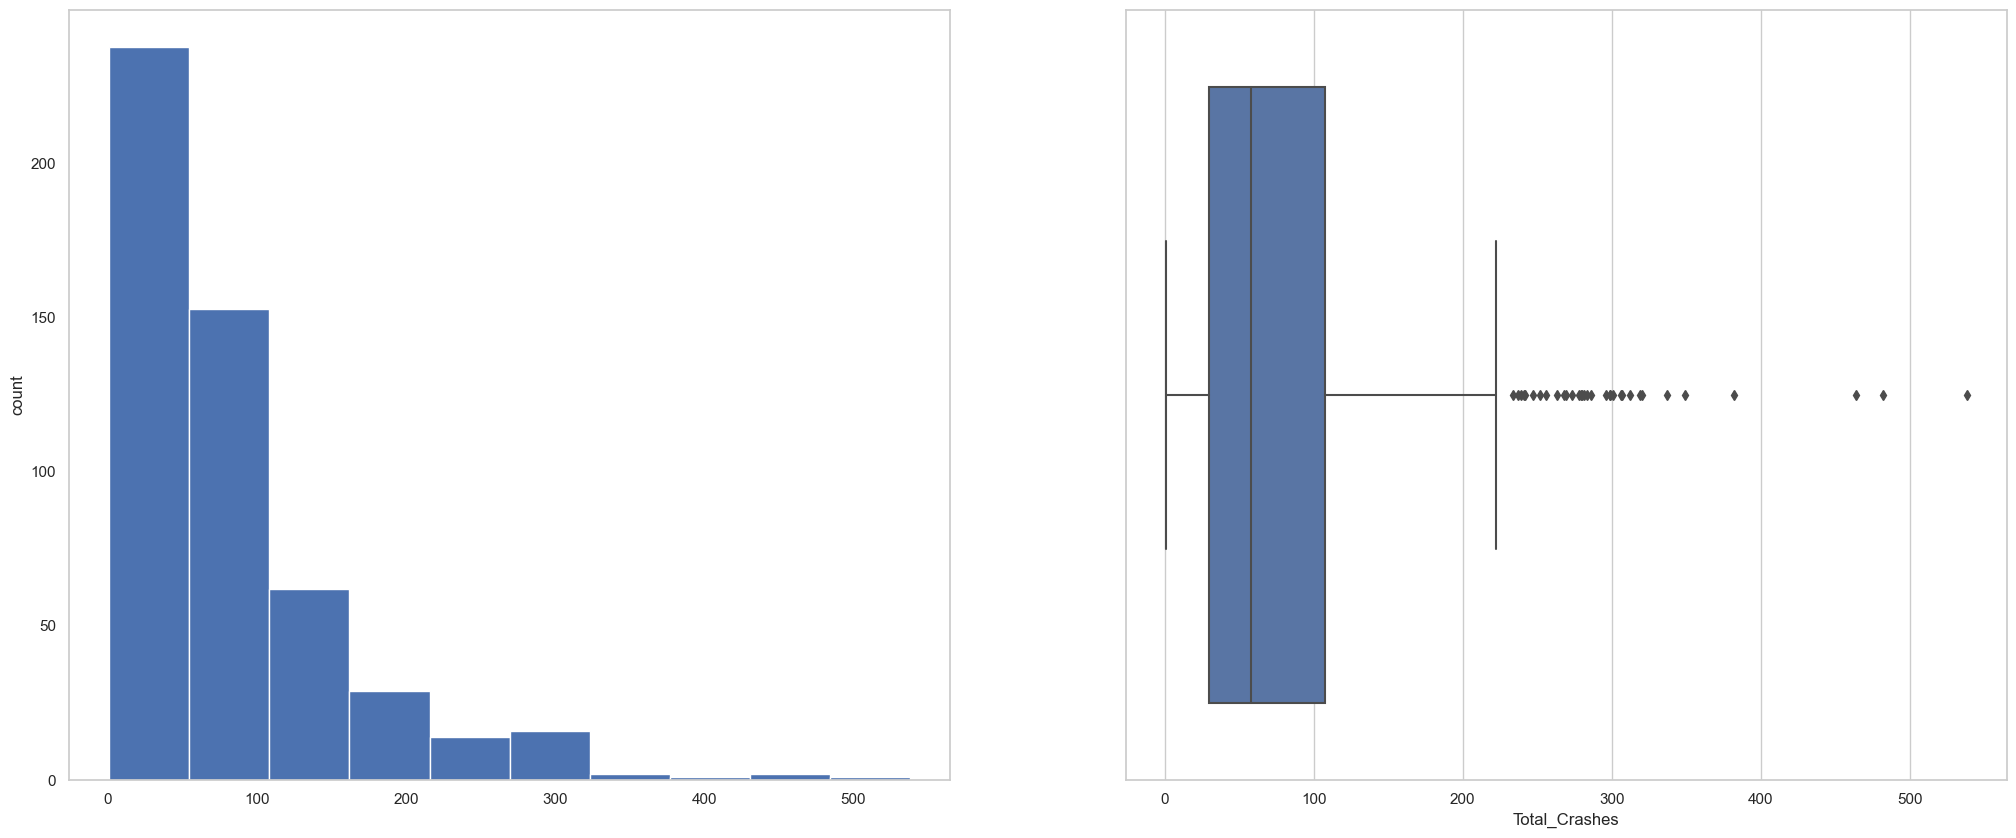

Num_Injured
Skew : 1.35


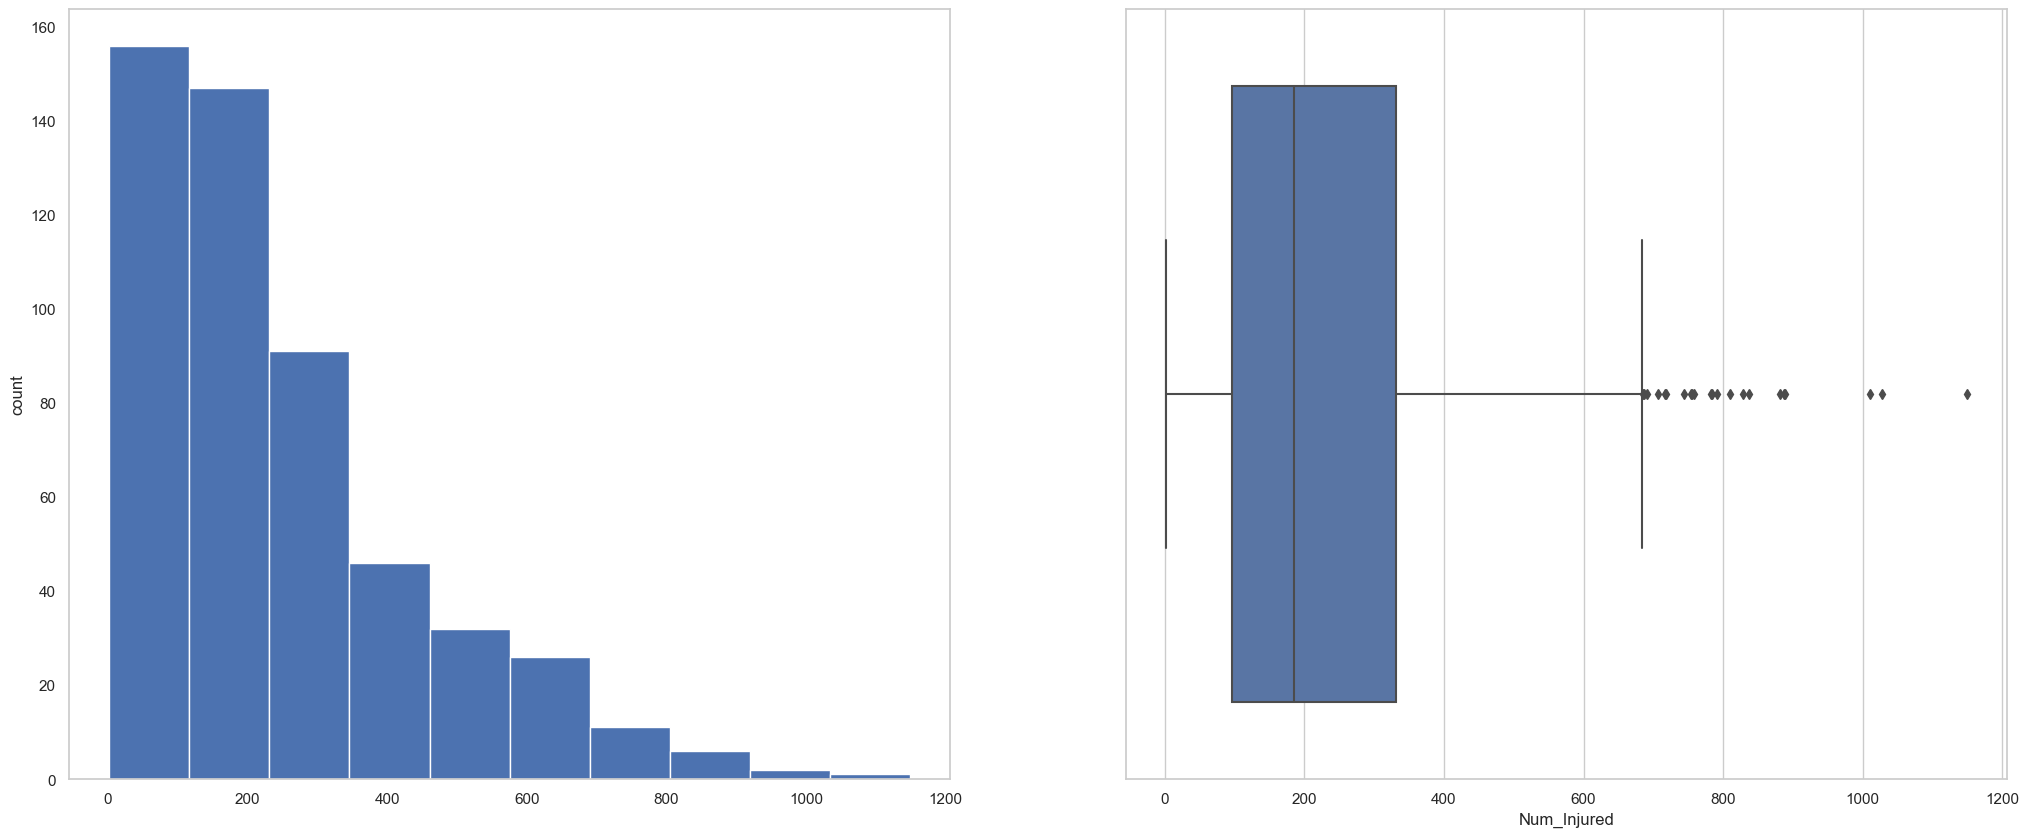

Num_Killed
Skew : 1.81


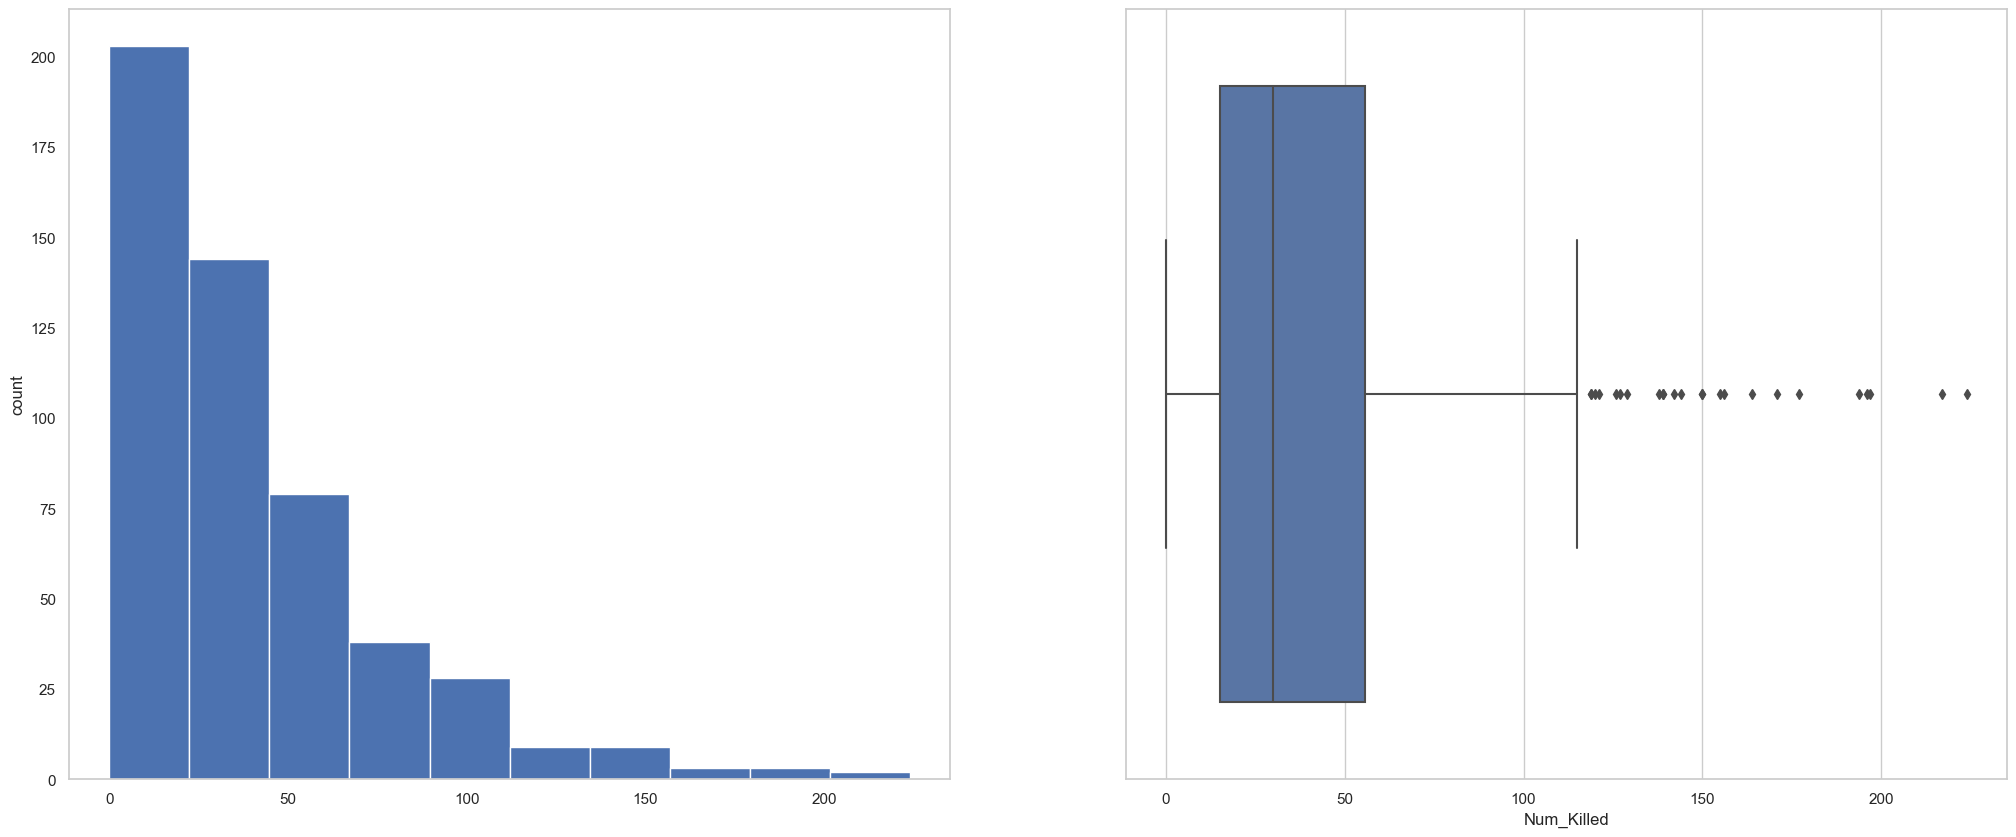

Total_Vehicles_Involved
Skew : 2.68


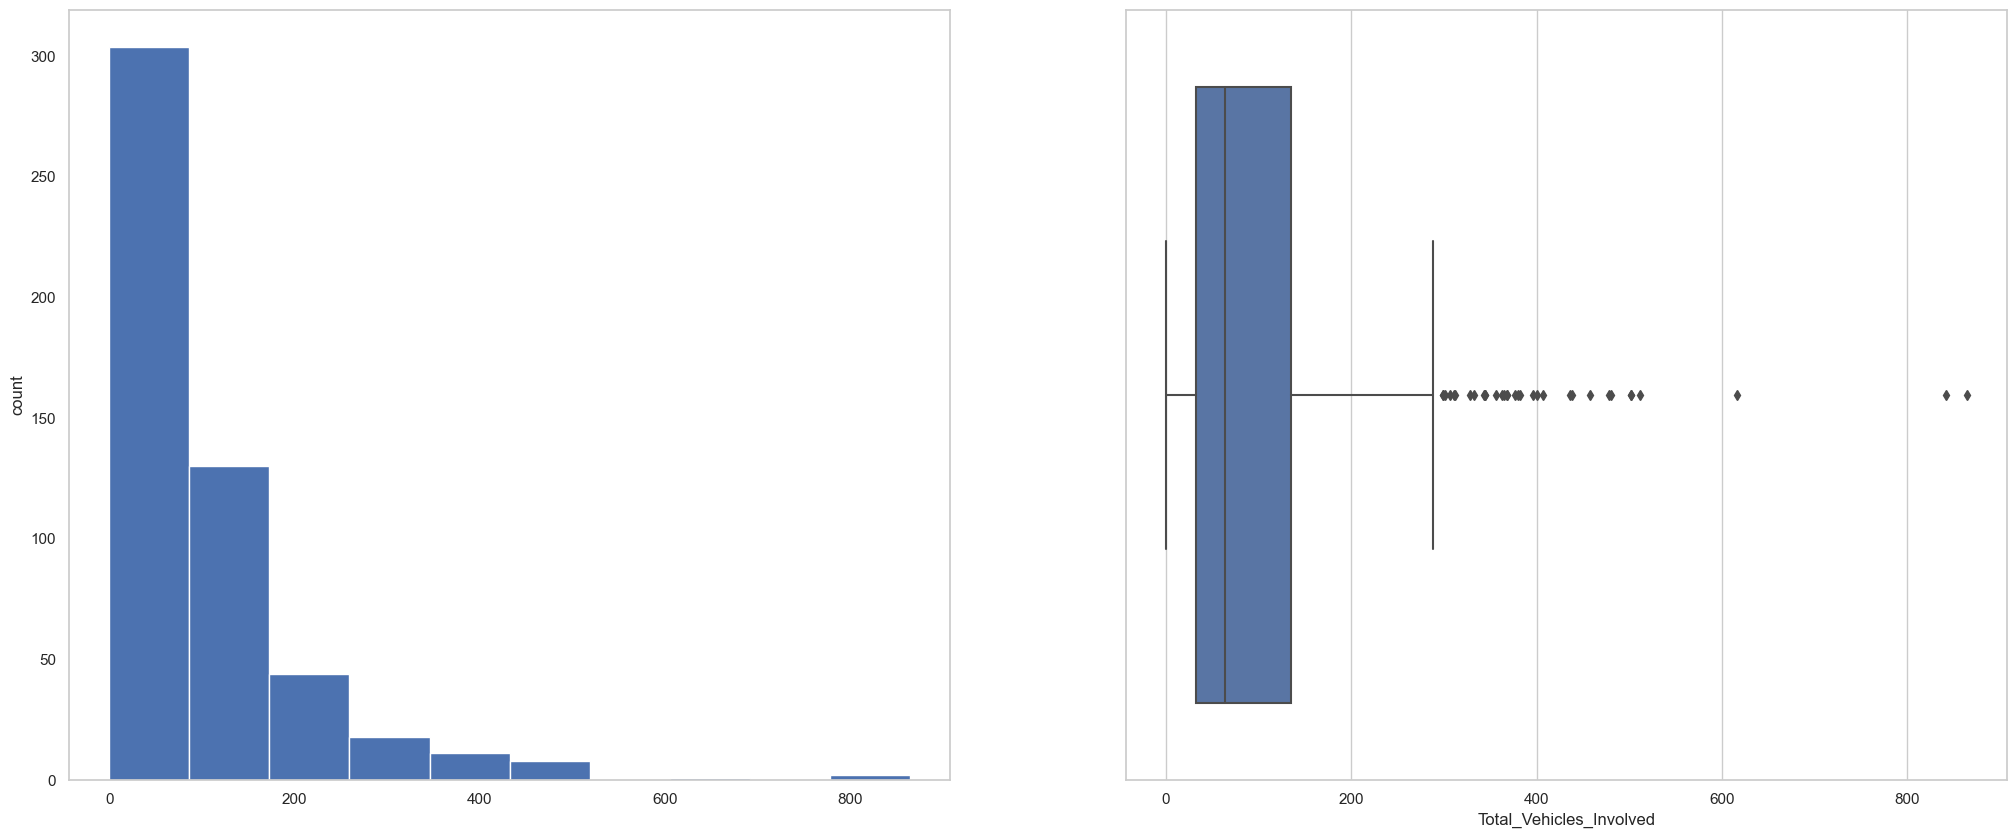

SPV
Skew : 2.56


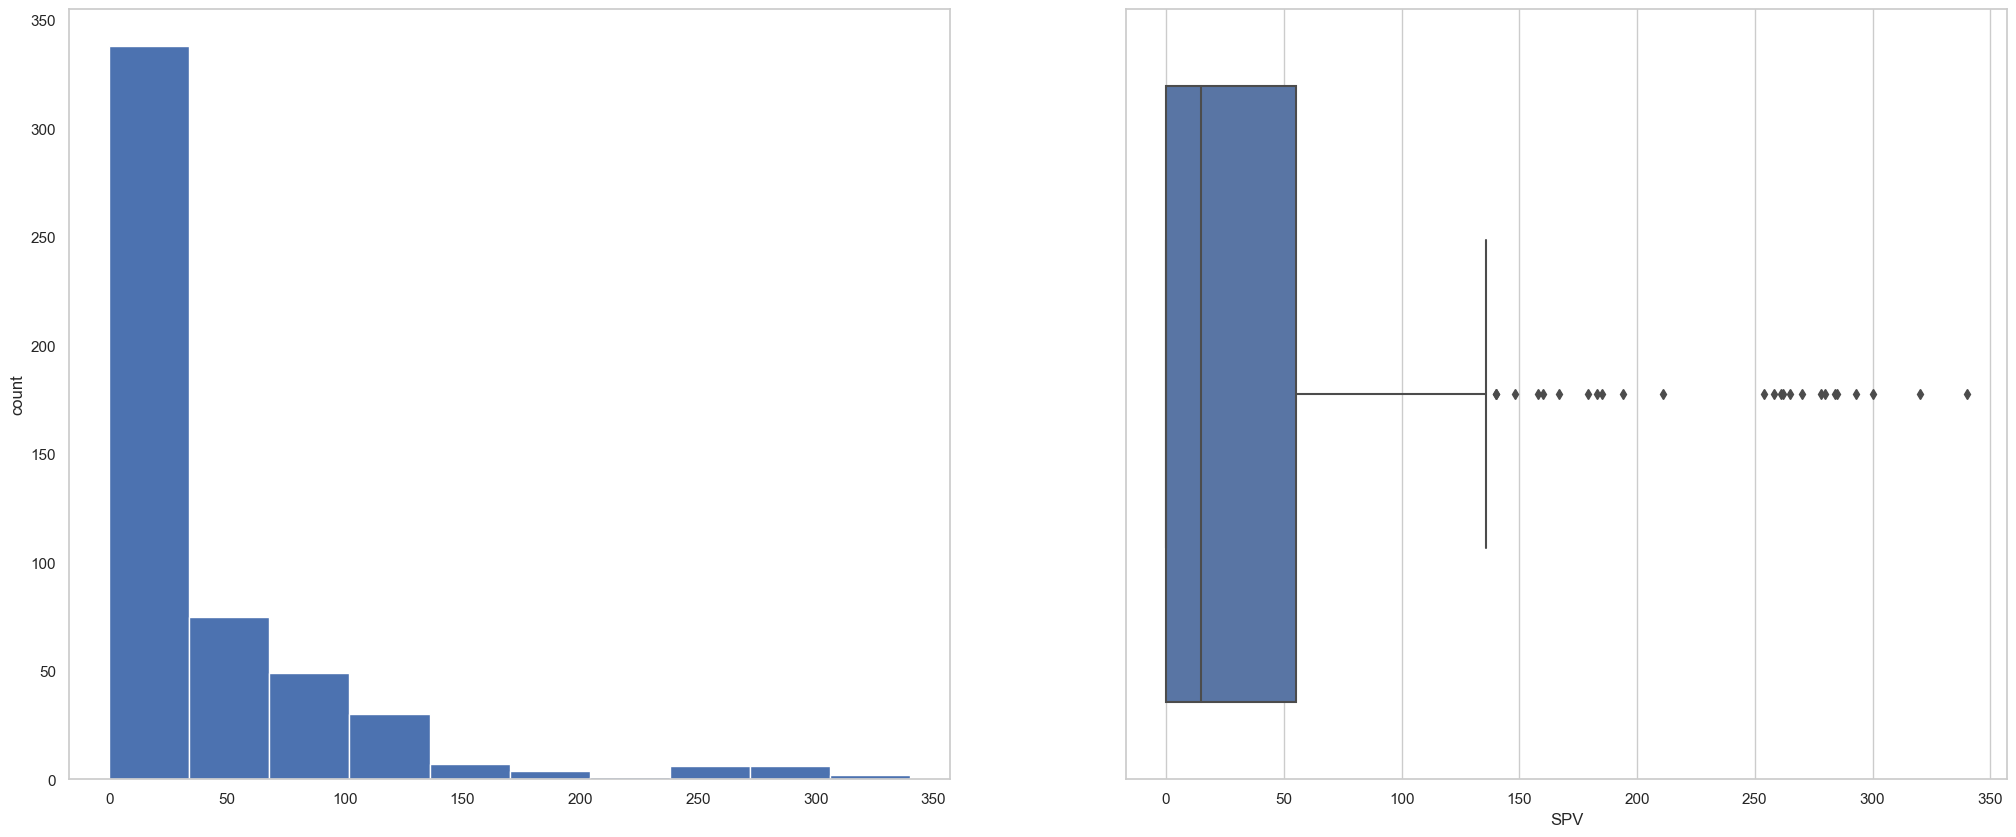

DAD
Skew : 3.9


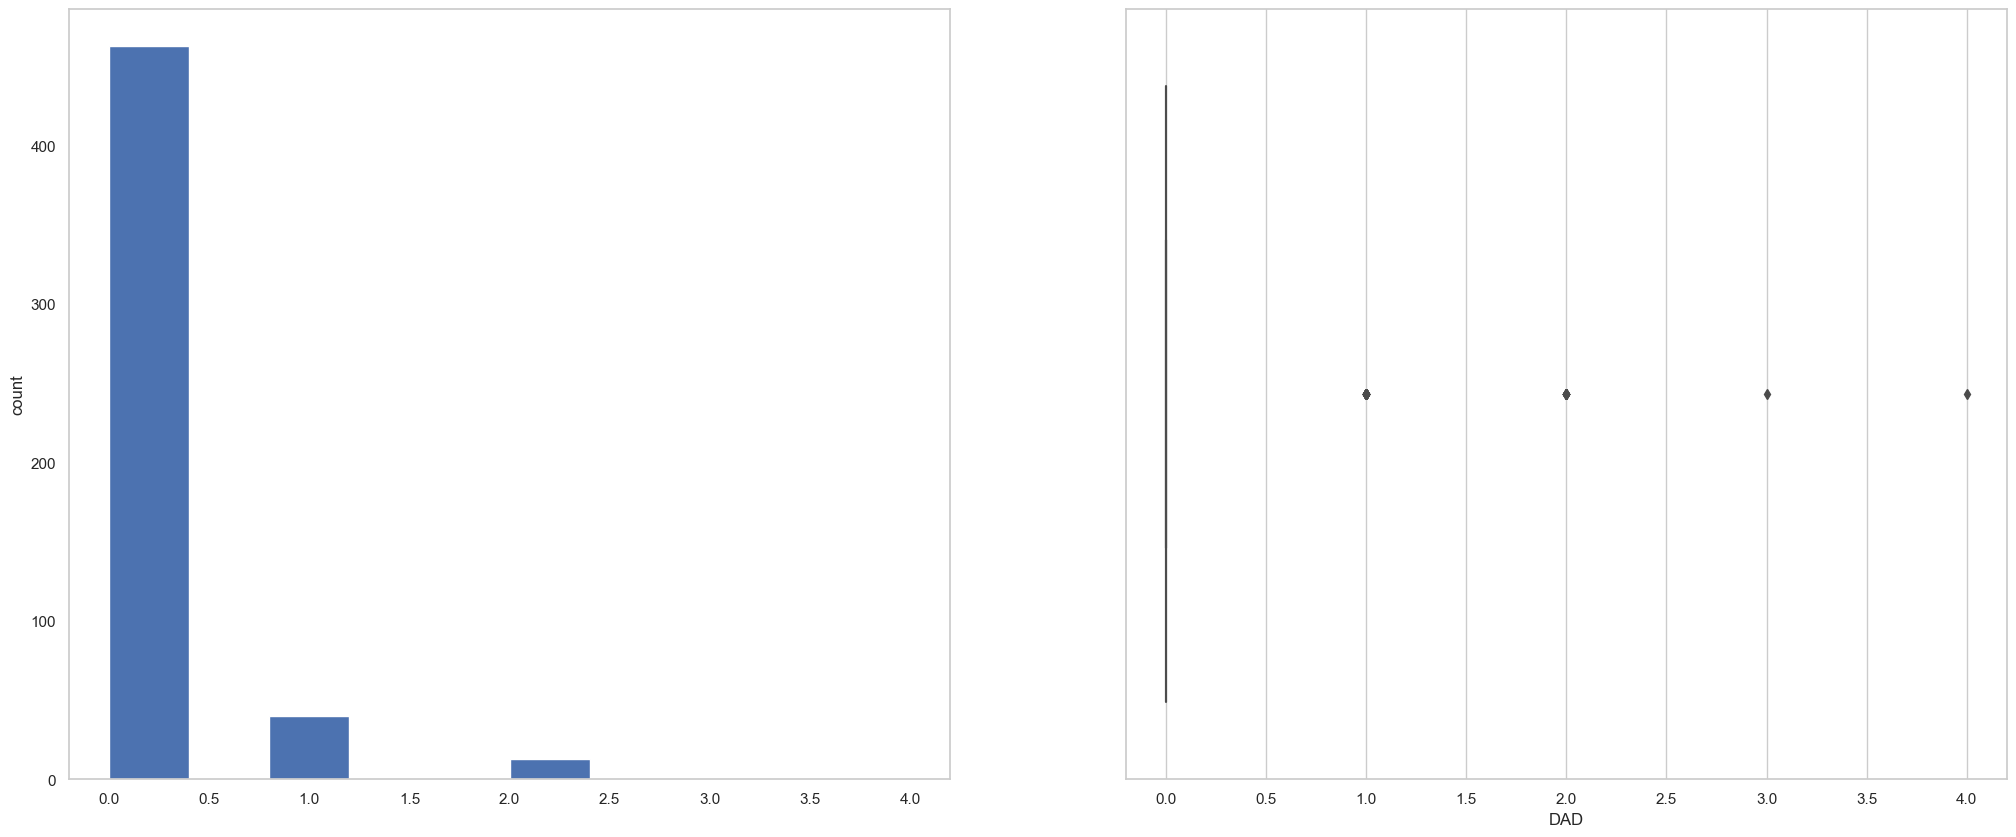

PWR
Skew : 10.48


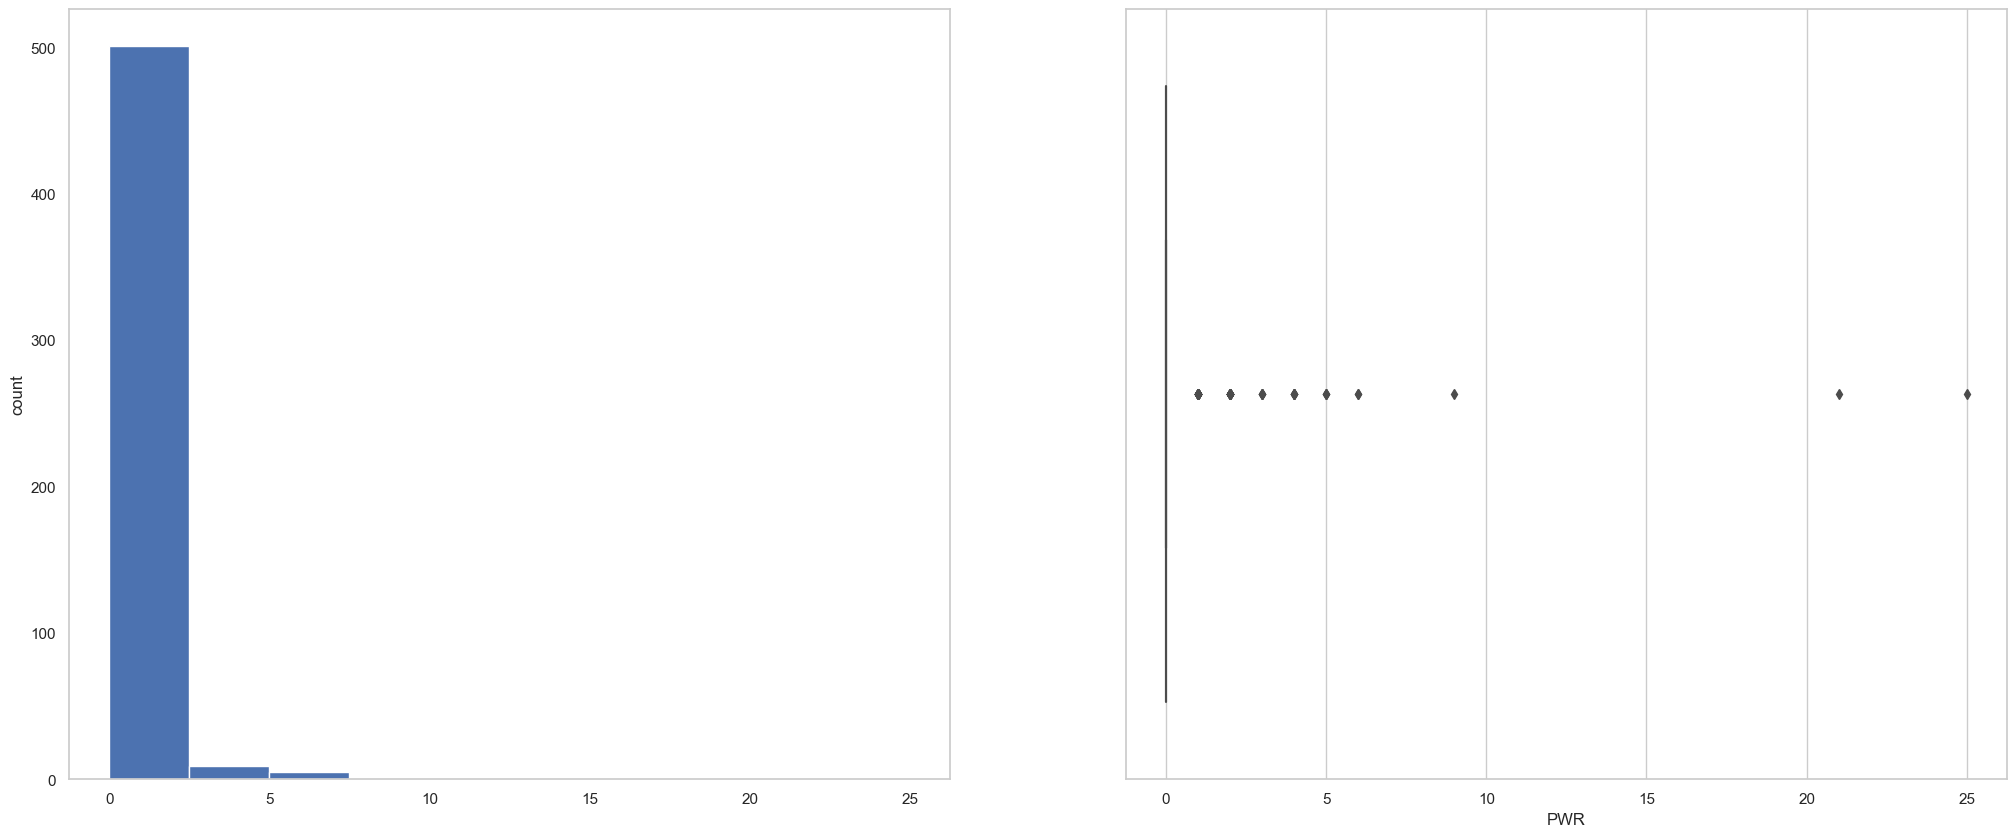

FTQ
Skew : 3.59


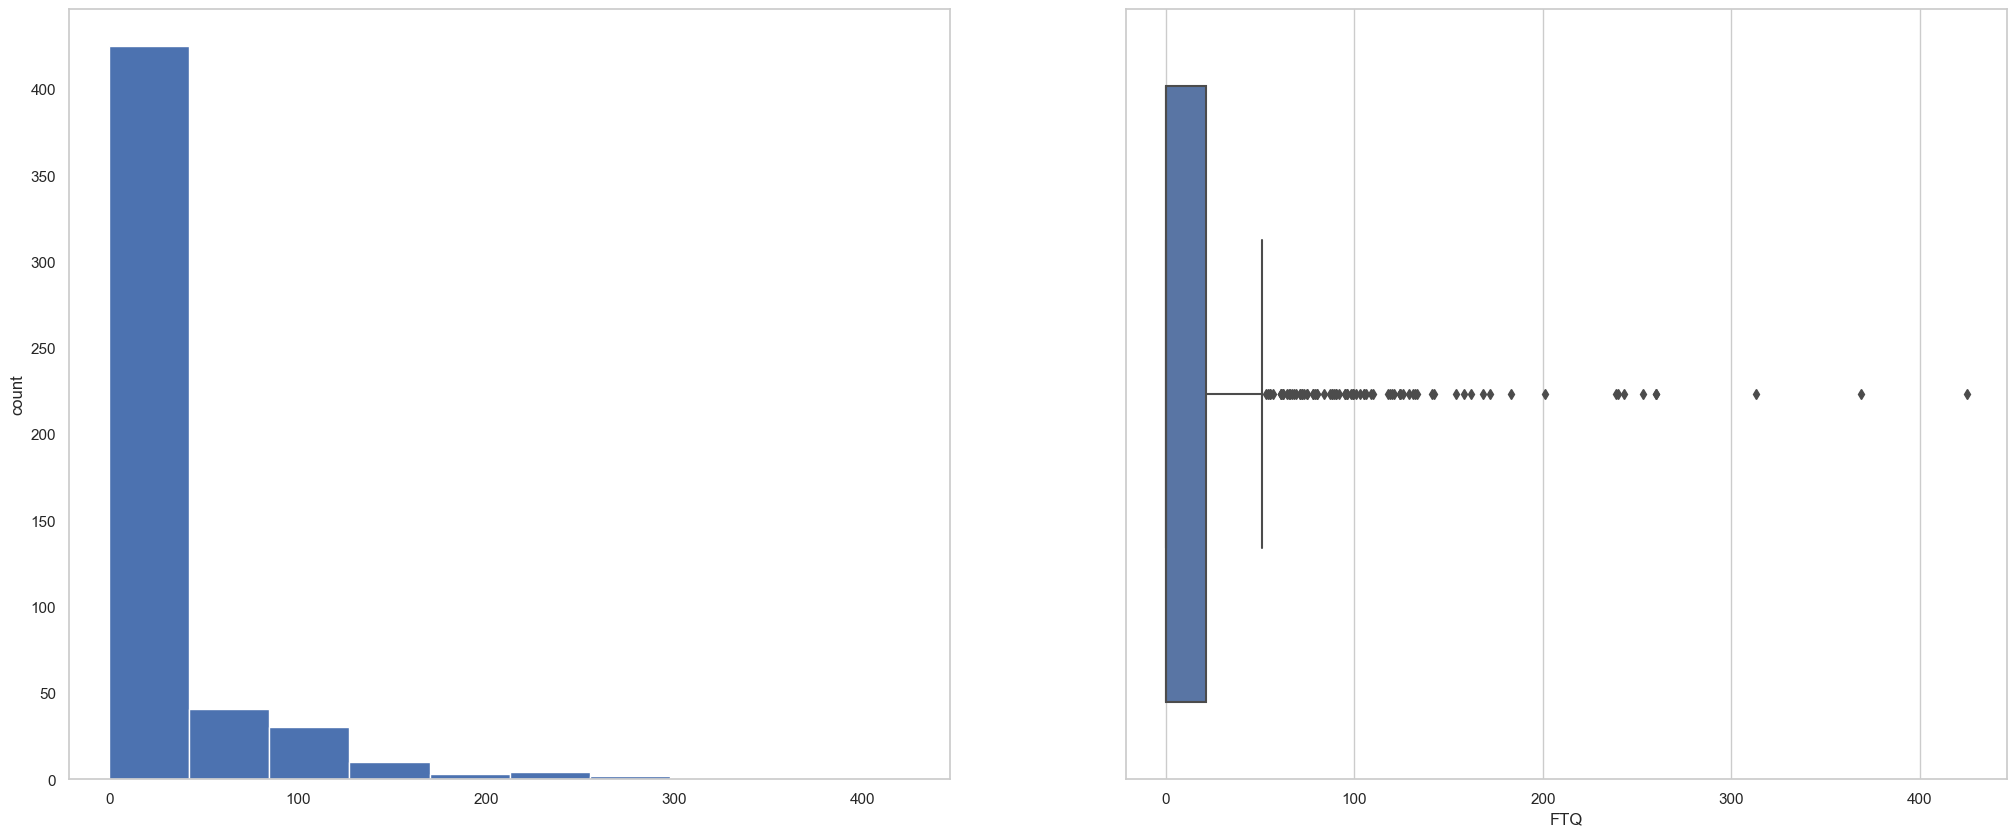

Other_Factors
Skew : 1.54


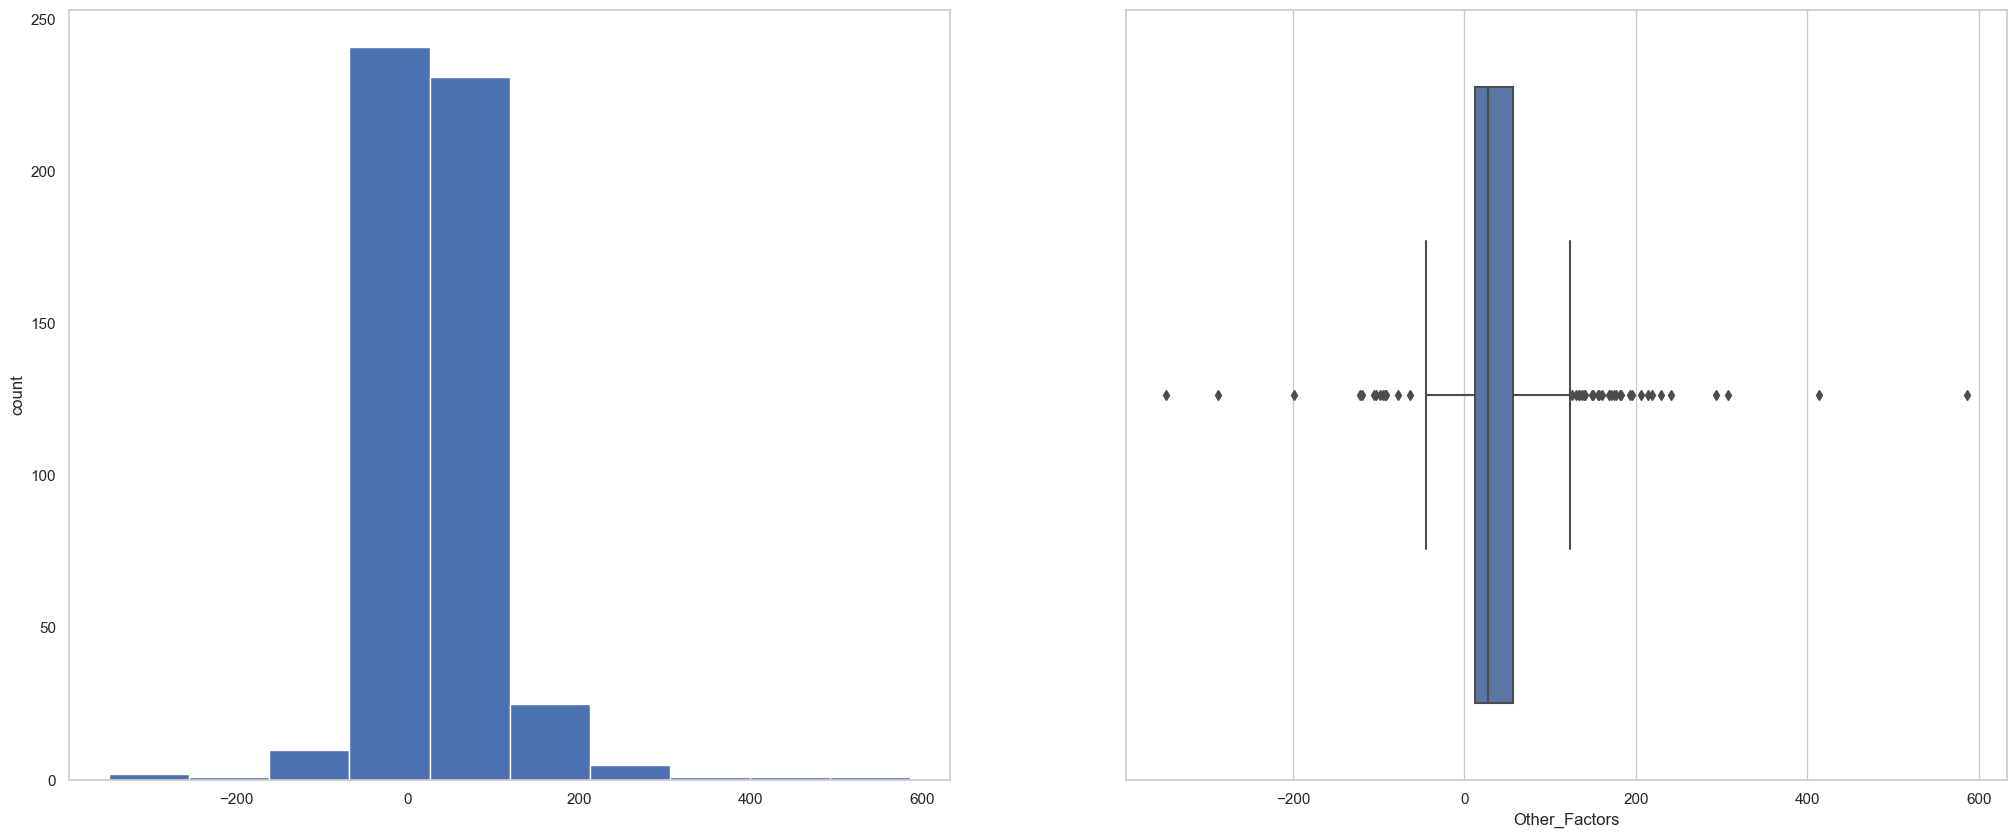

Year
Skew : 0.0


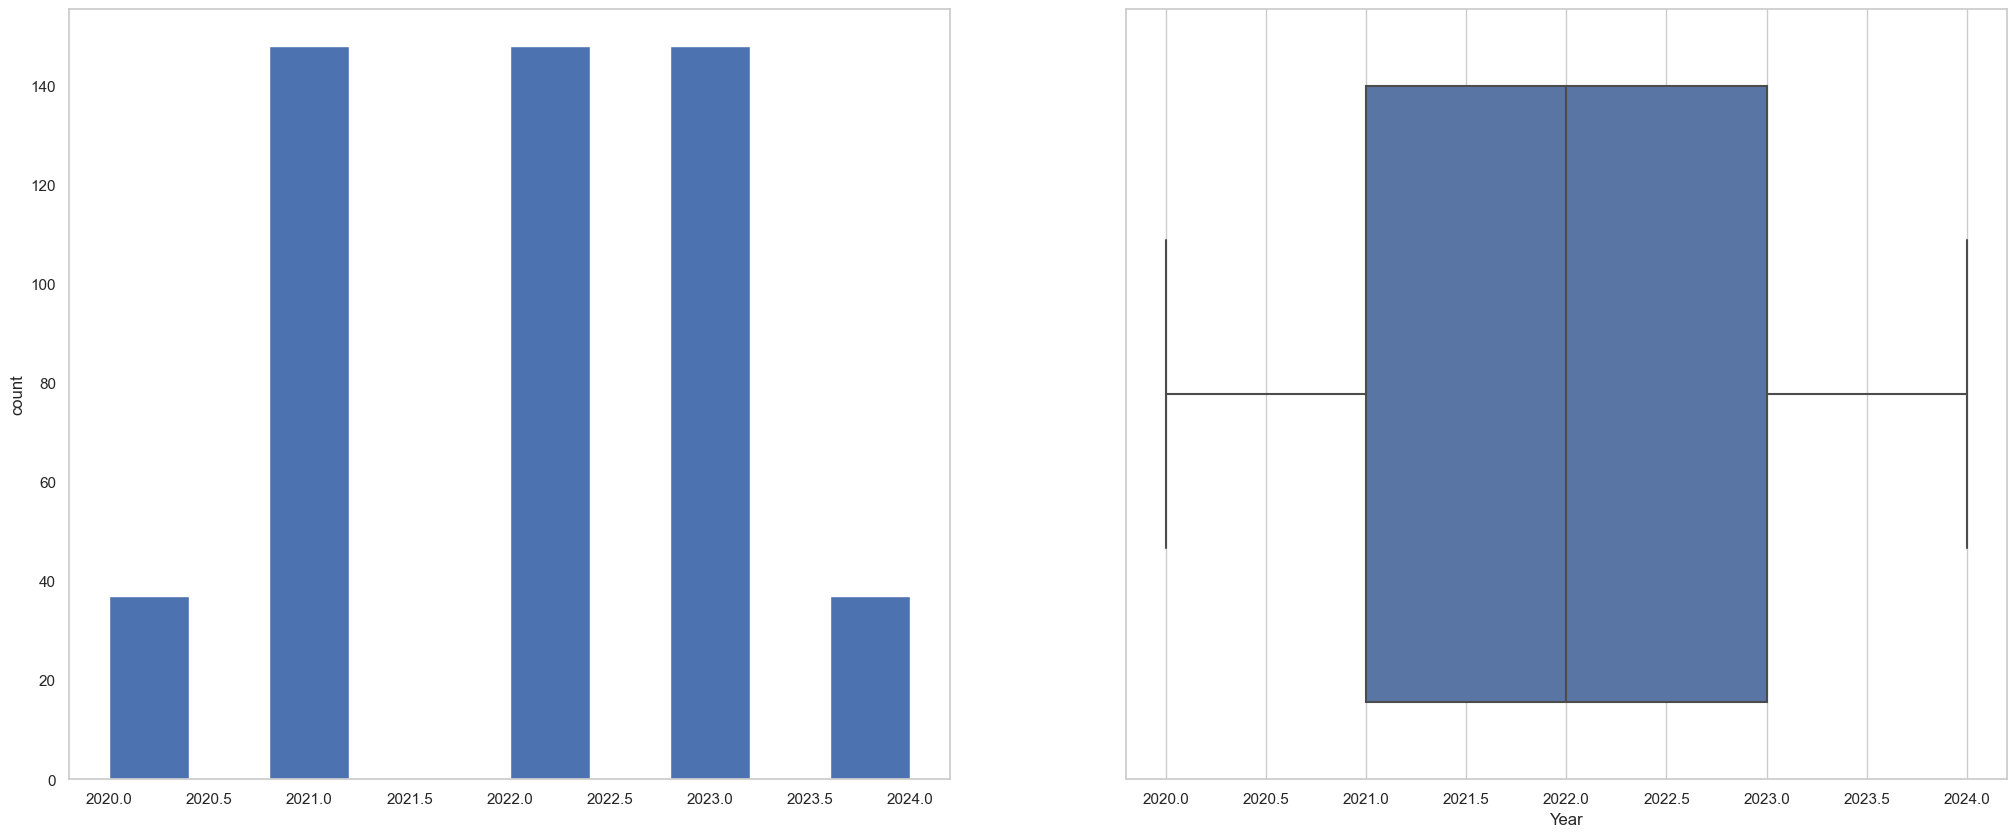

In [62]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (25, 10))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

### Pre Processing Data

We can see in the `other_factors` column there is a strange data that is a minus value

In [63]:
df[df['Other_Factors'] < 0]['Other_Factors'].count()

36

In [64]:
df[df['Other_Factors'] < 0]

,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors,Quartal,Year
259,Abia,24,101,9,2,0,0,0,22,-20,Q3,2022
260,Adamawa,32,72,3,0,0,0,0,21,-21,Q3,2022
261,Akwa Ibom,22,55,9,0,0,0,0,20,-20,Q3,2022
262,Anambra,42,103,20,3,1,0,0,19,-17,Q3,2022
263,Bauchi,129,436,94,8,0,0,1,98,-91,Q3,2022
264,Bayelsa,12,16,1,0,0,0,0,15,-15,Q3,2022
265,Benue,70,227,16,4,0,0,0,49,-45,Q3,2022
266,Borno,25,154,22,1,0,0,0,10,-9,Q3,2022
267,Cross River,28,48,17,0,0,0,0,26,-26,Q3,2022
268,Delta,44,137,25,5,0,0,2,13,-10,Q3,2022


And strangely this all happens in 2022 and quarter 3

In [65]:
print(df[df['Other_Factors'] < 0]['Year'].unique())

[2022]


In [66]:
print(df[df['Other_Factors'] < 0]['Quartal'].unique())

['Q3']


We try to calculate the proportion of data that is minus and not minus

In [67]:
# Menghitung proporsi nilai negatif dalam Other_Factors
prop_minus = (df[df['Other_Factors'] < 0].count() / df['Other_Factors'].count()) * 100

# Menghitung proporsi nilai bukan negatif (>= 0)
prop_not_minus = (df[df['Other_Factors'] >= 0].count() / df['Other_Factors'].count()) * 100

# Mencetak hasil
print("Proportion of Other Factors < 0: {:.2f}%".format(prop_minus['Other_Factors']))
print("Proportion of Other Factors >= 0: {:.2f}%".format(prop_not_minus['Other_Factors']))


Proportion of Other Factors < 0: 6.95%
Proportion of Other Factors >= 0: 93.05%


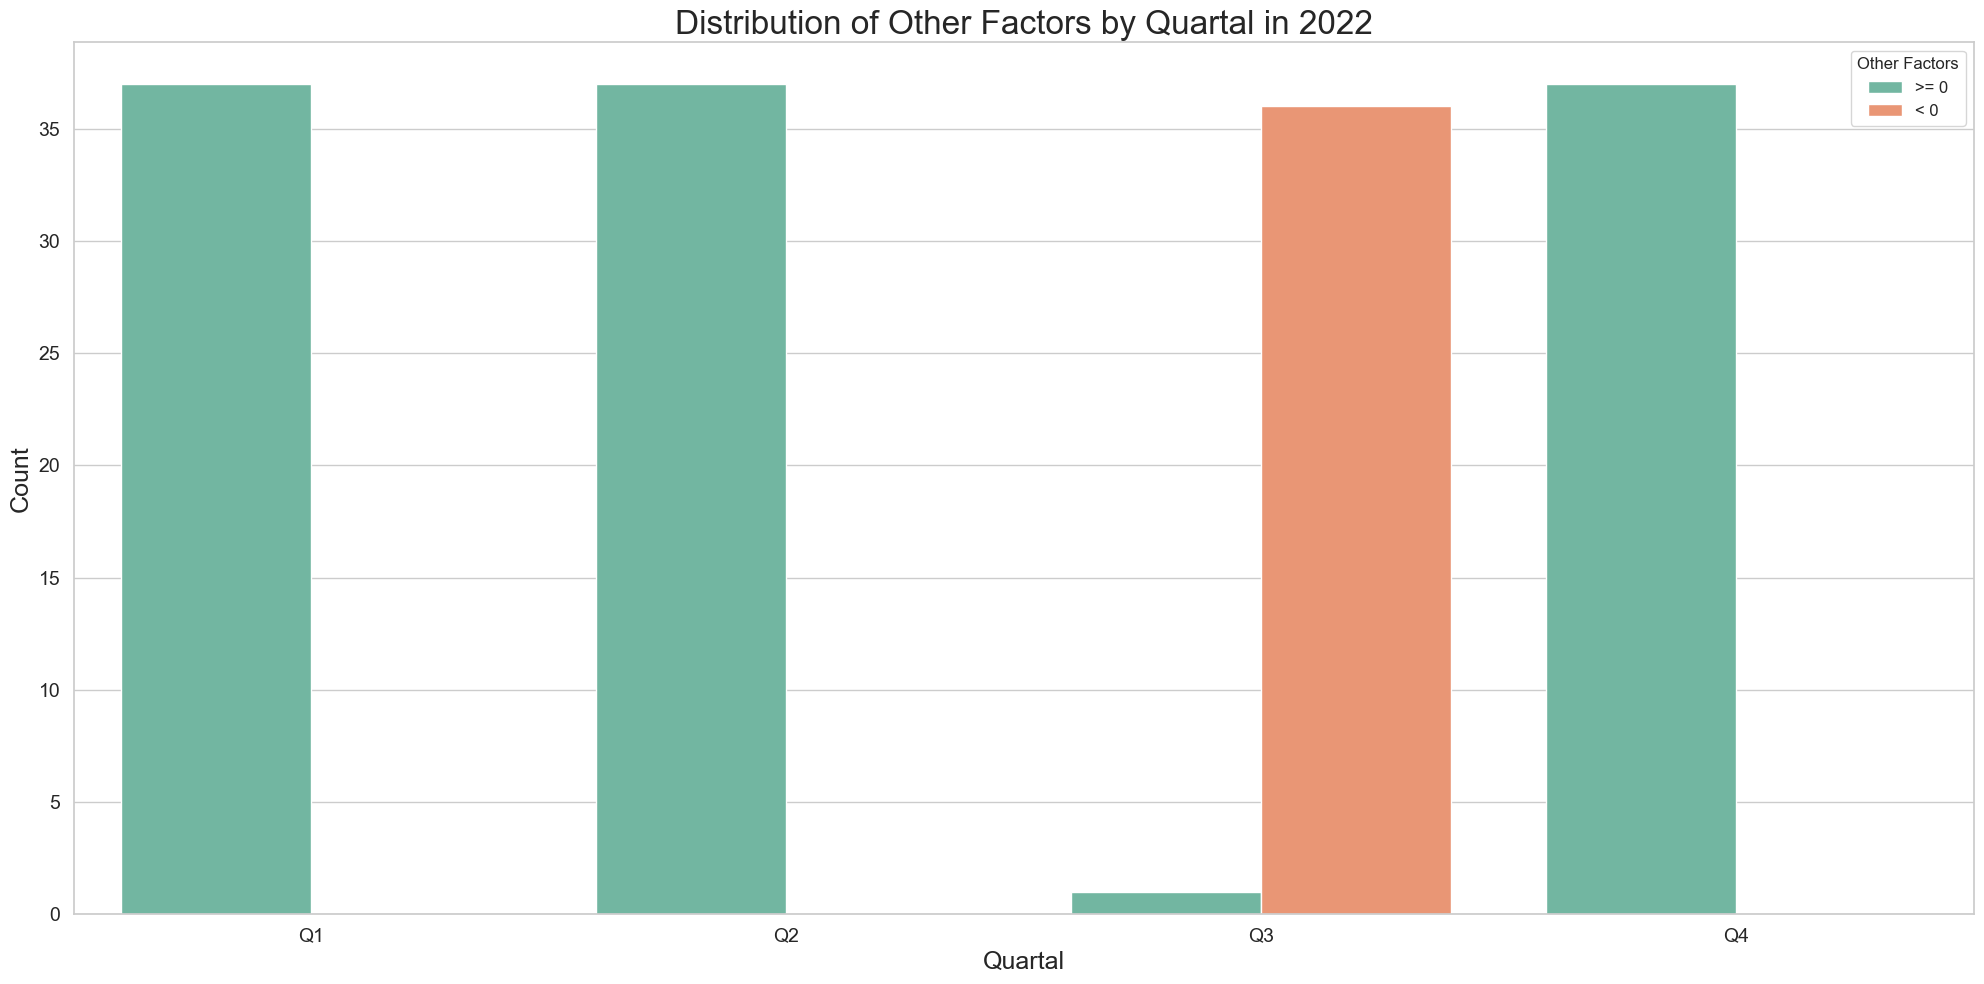

In [68]:
# Filter data untuk tahun 2022
df_2022 = df[df['Year'] == 2022]

# Kategorikan data
df_2022['Factor_Category'] = df_2022['Other_Factors'].apply(lambda x: '>= 0' if x >= 0 else '< 0')

# Buat plot countplot untuk distribusi Other Factors berdasarkan quartal dan kategori
plt.figure(figsize=(20, 10))
sns.countplot(data=df_2022, x='Quartal', hue='Factor_Category', palette='Set2')

# Judul dan label
plt.title('Distribution of Other Factors by Quartal in 2022', fontsize=24)
plt.xlabel('Quartal', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Other Factors', fontsize=12)
plt.tight_layout()
plt.show()

#### Data Cleaning

It can be seen that in 2022 in Q3 the dominant value of `Other_Factors` < 0

We can see that `Others_Factor` contains very small values ​​for example -348. We consider this to be strange data and must be cleaned to resolve it

### 1. **Negative Values Are Illogical** :

In the context of crash data, negative values for `Other_Factors` don’t make sense, as they represent events that cannot be less than zero. Replacing them with 0 ensures consistency since 0 logically indicates no incidents from these factors.

### 2. **Data Consistency** :

If the majority of values in `Other_Factors` are positive or zero, negative values break the consistency. Replacing negatives with 0 maintains data integrity by aligning with the dataset's natural distribution.

### 3. **Prevents Statistical Distortion** :

Negative values can skew statistical analyses, leading to incorrect averages, totals, or distributions. Replacing them with 0 prevents this distortion and provides more accurate results in analytics.

### 4. **Clear Interpretation** :

Replacing negative values with 0 gives the data a clearer meaning. While negative numbers are ambiguous, 0 clearly indicates that no incidents occurred due to `Other_Factors`.

### 5. **Handling Missing or Incorrect Data** :

When data is missing or incorrect, 0 is a safer default than keeping negative values. It suggests no incidents from `Other_Factors`, avoiding confusion or misinterpretation.

In summary, replacing negative values with 0 enhances consistency, prevents analytical errors, and ensures that the data is easier to interpret.


In [69]:
df['Other_Factors'] = df['Other_Factors'].apply(lambda x: 0 if x < 0 else x)

In [70]:
df[df['Other_Factors'] < 0]['Other_Factors'].count()

0

In [71]:
df.describe()

,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors,Year
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,83.517375,245.631274,40.600386,100.667954,37.903475,0.140927,0.355212,23.824324,43.090734,2022.000000
std,77.023061,201.131483,36.858302,108.567113,57.093042,0.454320,1.677385,51.024267,52.522975,1.070078
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000
25%,30.000000,96.250000,15.000000,32.000000,0.000000,0.000000,0.000000,0.000000,12.000000,2021.000000
50%,58.000000,185.500000,30.000000,64.000000,15.000000,0.000000,0.000000,0.000000,27.000000,2022.000000
75%,107.750000,331.500000,55.750000,134.750000,55.000000,0.000000,0.000000,21.000000,57.000000,2023.000000
max,538.000000,1149.000000,224.000000,864.000000,340.000000,4.000000,25.000000,425.000000,586.000000,2024.000000


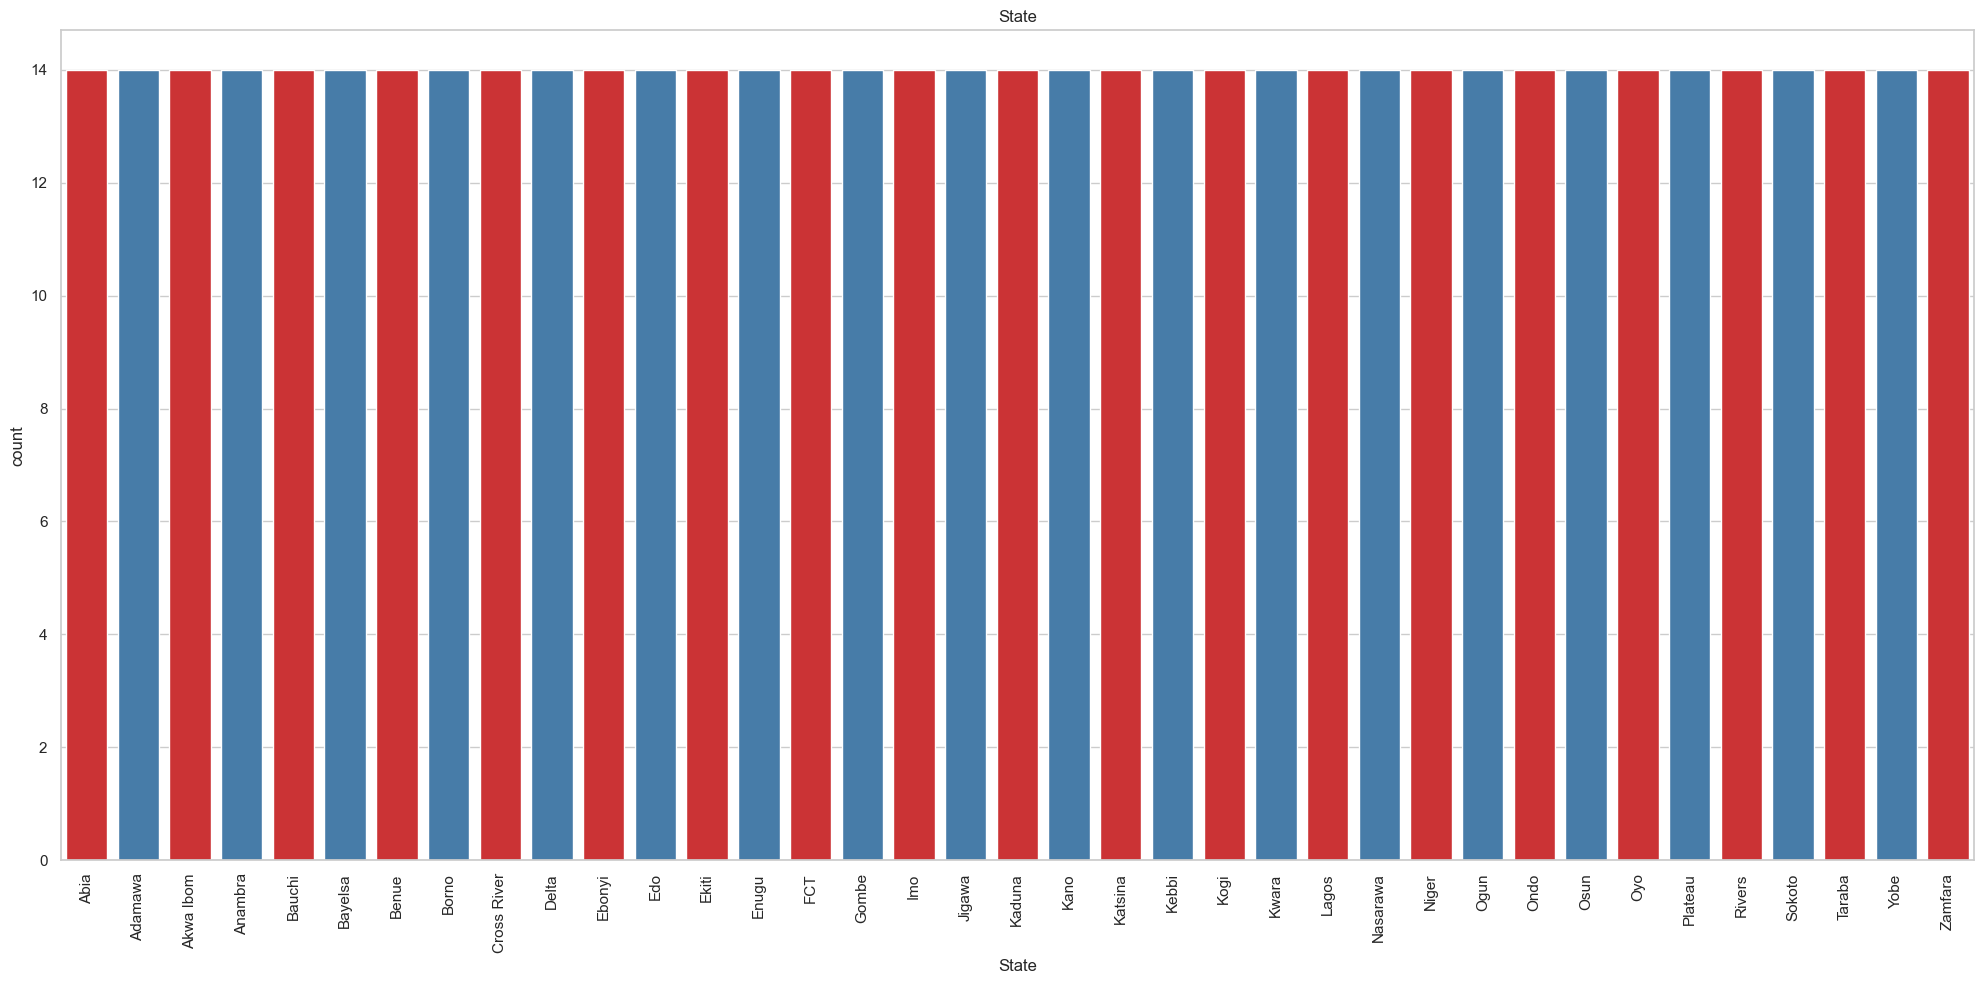

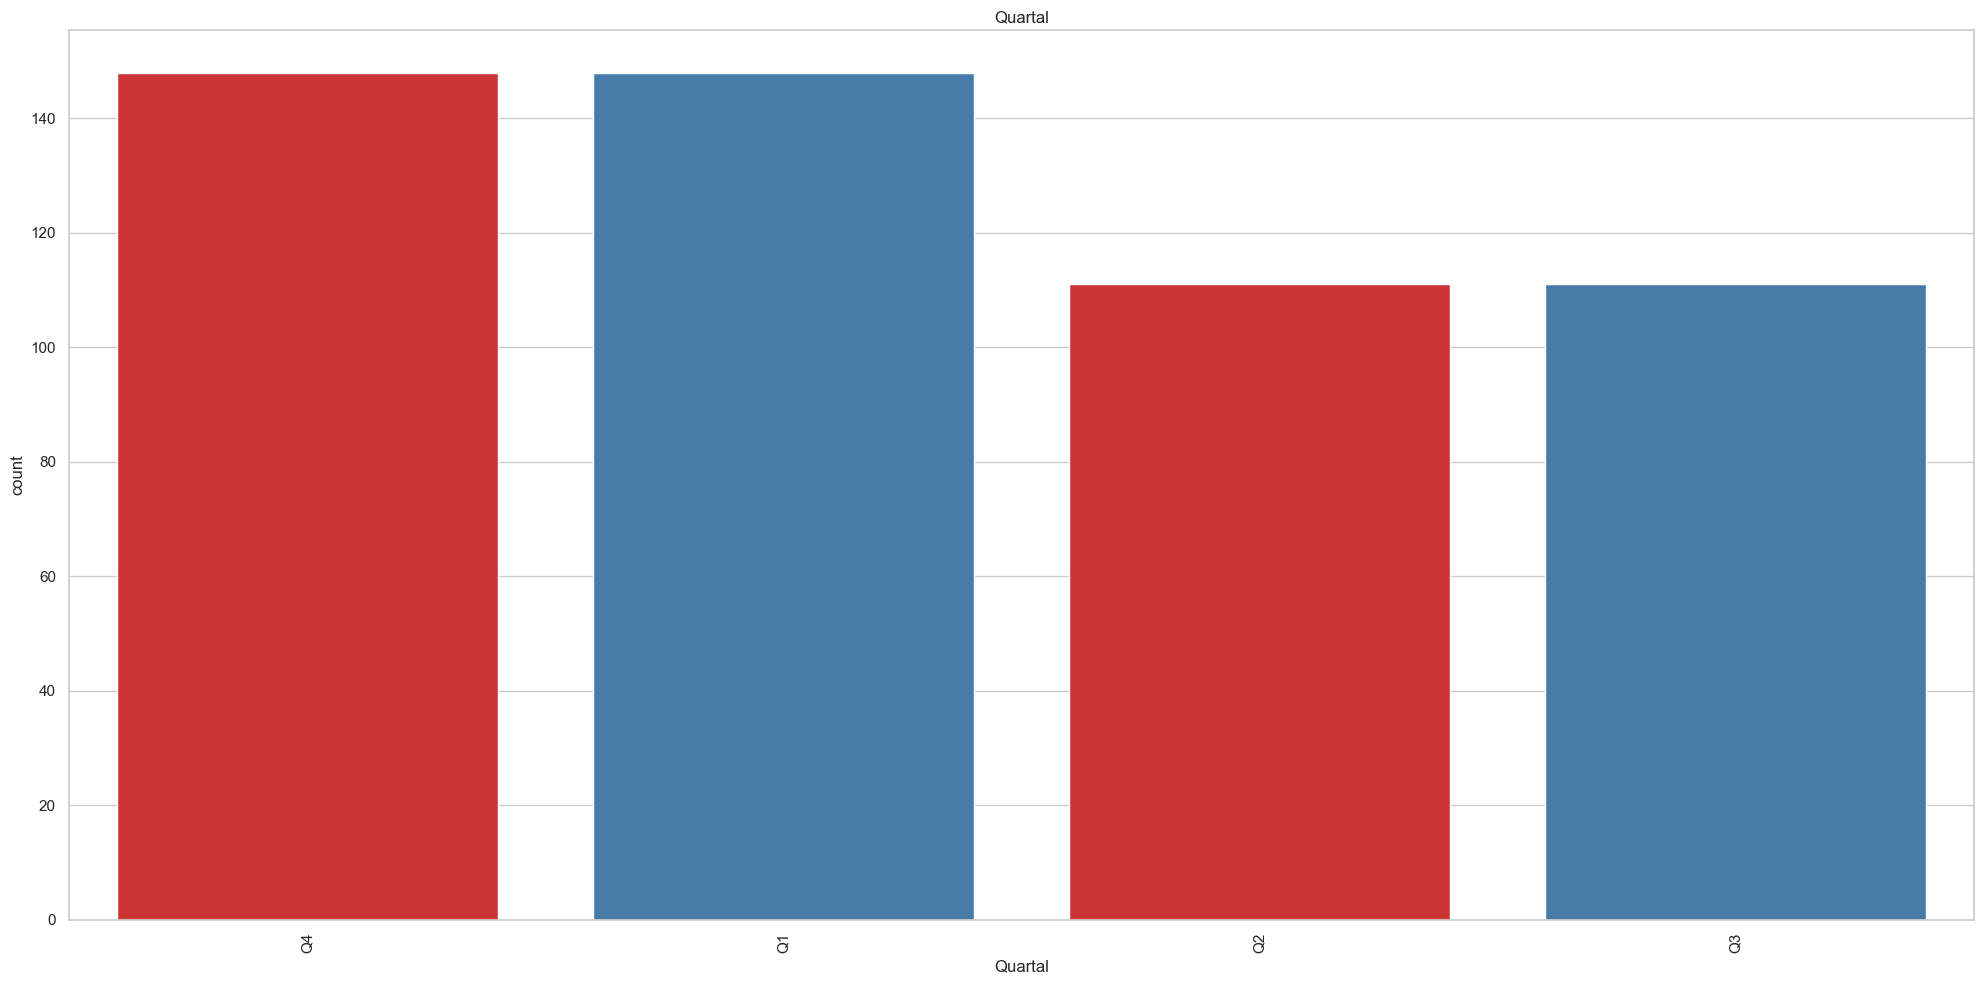

In [72]:
color_palette = sns.color_palette("Set1", len(cat_cols))
for i, column in enumerate(cat_cols, 1):
    plt.figure(figsize=(20, 10))
    sns.countplot(data=df, x=column, palette=color_palette)
    plt.xticks(rotation=90)
    plt.title(column)
    plt.tight_layout()
    plt.show()

## Crashes Analysis

#### Quartaliac Crashes Analysis

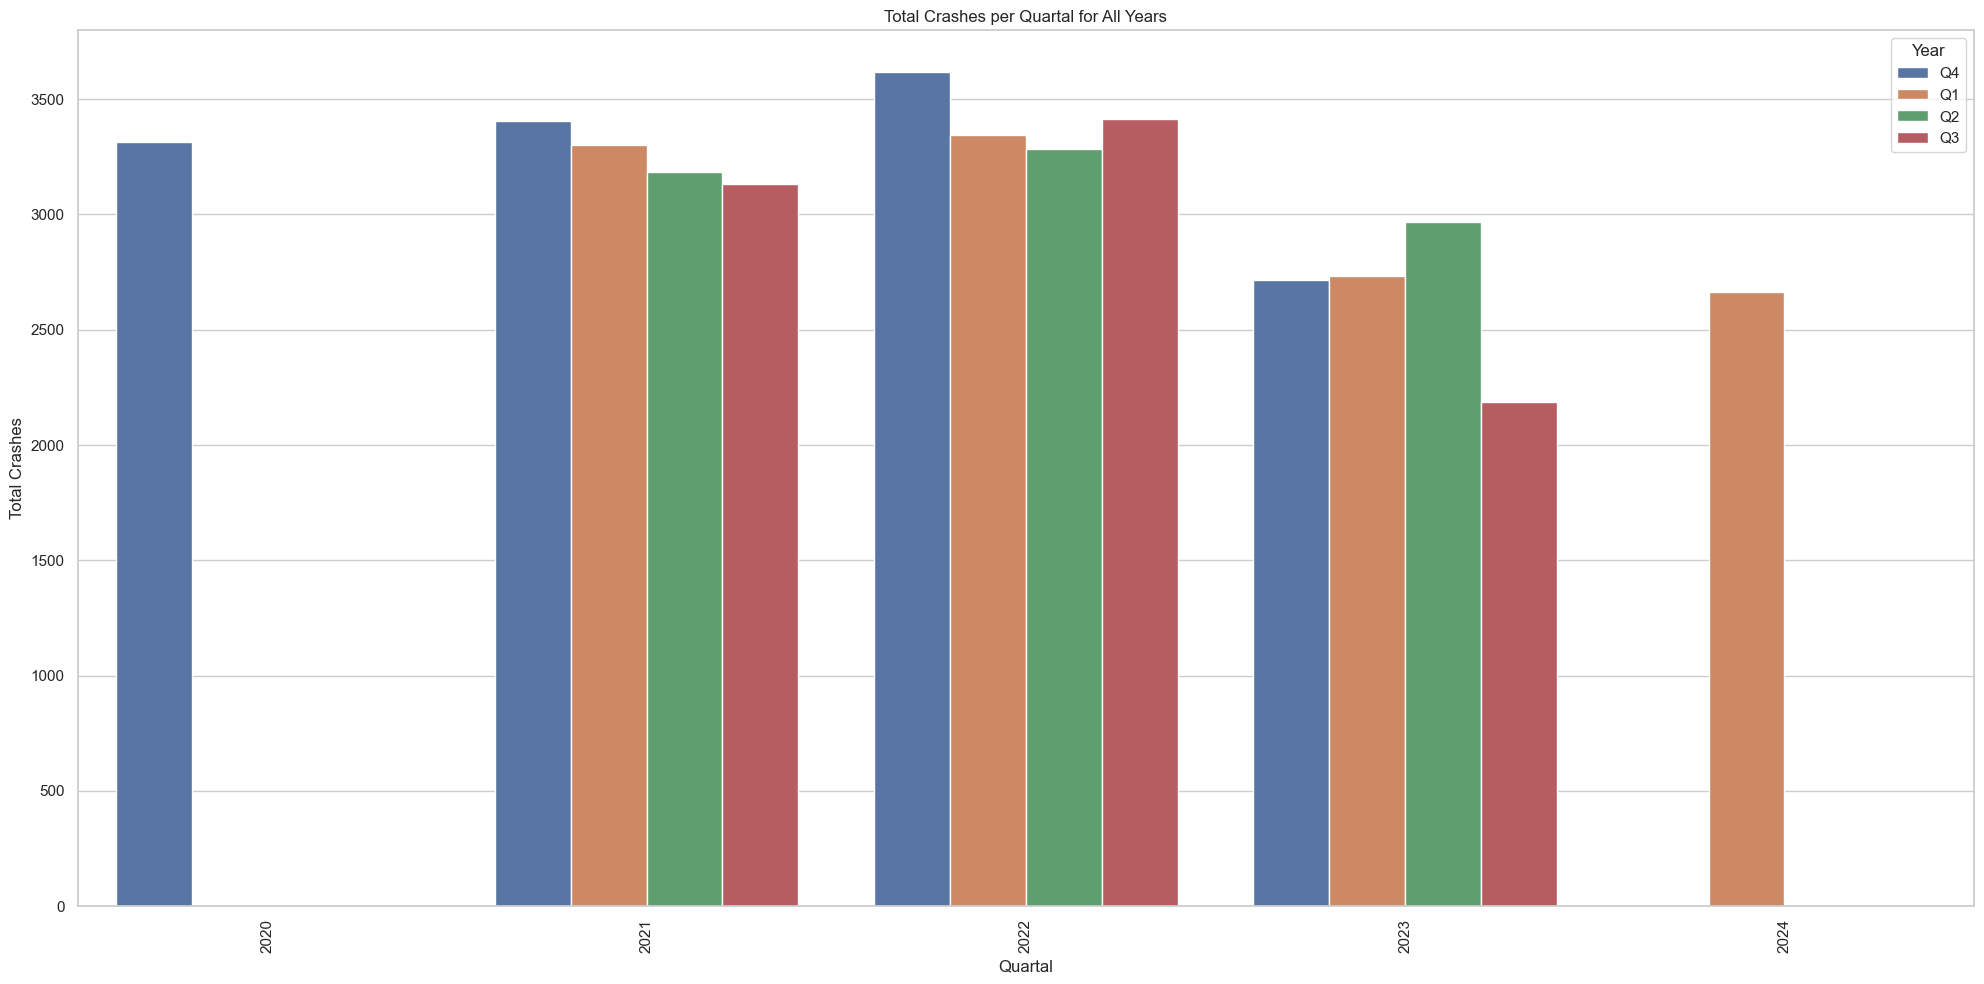

In [73]:
# Grupkan data berdasarkan 'Year' dan 'Quartal' untuk menghitung total crashes
df_grouped = df.groupby(['Year', 'Quartal']).agg({'Total_Crashes': 'sum'}).reset_index()

# Buat plot dengan total crashes berdasarkan quartal dan membedakan tahun dengan hue
plt.figure(figsize=(20, 10))
sns.barplot(data=df_grouped, x='Year', y='Total_Crashes', hue='Quartal')

plt.xticks(rotation=90)
plt.title('Total Crashes per Quartal for All Years')
plt.xlabel('Quartal')
plt.ylabel('Total Crashes')
plt.legend(title='Year')
plt.tight_layout()
plt.show()


It can be seen that the most dominant accidents occurred in the year-end period (Q4)

#### Injured Vs Killed

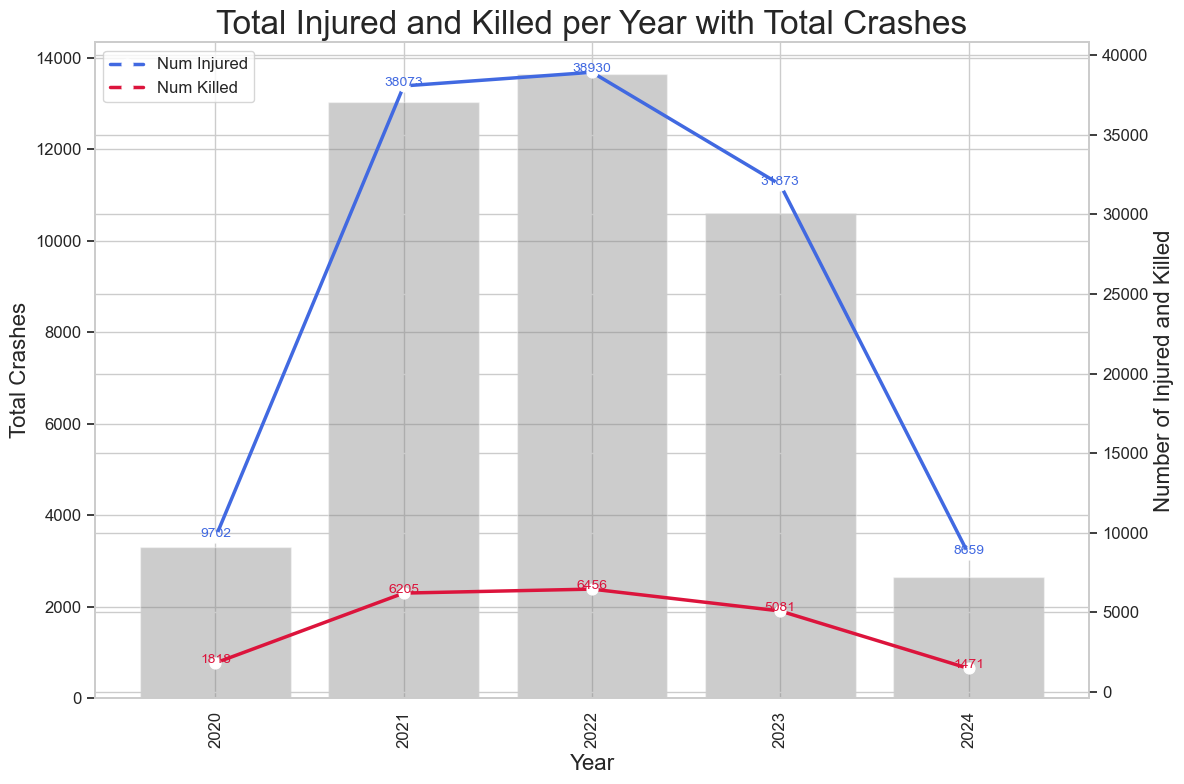

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df_grouped = df.groupby('Year').agg({'Num_Injured': 'sum', 'Num_Killed': 'sum', 'Total_Crashes': 'sum'}).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.bar(df_grouped['Year'], df_grouped['Total_Crashes'], alpha=0.4, label='Total Crashes', color='grey')
ax1.set_ylabel('Total Crashes', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.tick_params(axis='x', rotation=90, labelsize=12)
ax1.tick_params(axis='y', labelsize=12)


ax2 = ax1.twinx()
sns.lineplot(data=df_grouped, x='Year', y='Num_Injured', marker='o', label='Num Injured', 
             color='royalblue', linewidth=2.5, markerfacecolor='white', markersize=8, ax=ax2)
sns.lineplot(data=df_grouped, x='Year', y='Num_Killed', marker='o', label='Num Killed', 
             color='crimson', linewidth=2.5, markerfacecolor='white', markersize=8, ax=ax2)

ax2.set_ylabel('Number of Injured and Killed', fontsize=16)
ax2.tick_params(axis='y', labelsize=12)

plt.title('Total Injured and Killed per Year with Total Crashes', fontsize=24)
ax2.legend(loc='upper left', fontsize=12)

for i in range(len(df_grouped)):
    ax2.text(x=df_grouped['Year'][i], y=df_grouped['Num_Injured'][i], 
             s=df_grouped['Num_Injured'][i], color='royalblue', ha='center', fontsize=10)
    ax2.text(x=df_grouped['Year'][i], y=df_grouped['Num_Killed'][i], 
             s=df_grouped['Num_Killed'][i], color='crimson', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


It can be seen that the most frequent accidents occurred in 2022 where an increase occurred from 2020 to 2021 and experienced a significant decrease from 2022 to Q1 2024

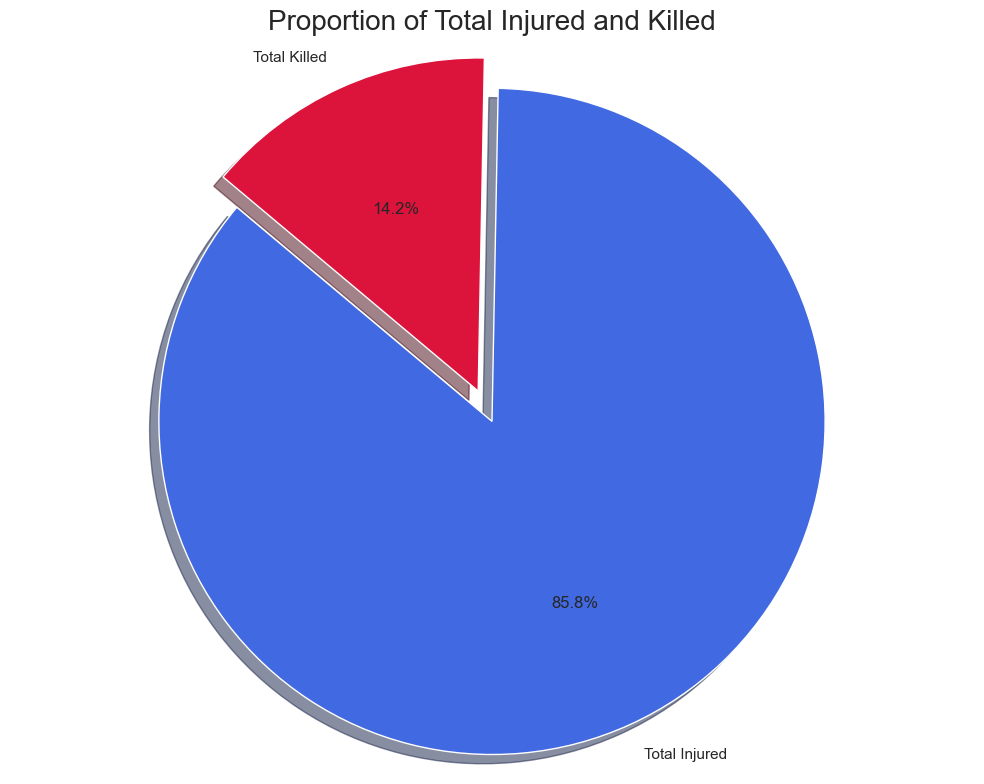

In [75]:

df_grouped = df.groupby('Year').agg({'Num_Injured': 'sum', 'Num_Killed': 'sum'}).reset_index()

total_injured = df_grouped['Num_Injured'].sum()
total_killed = df_grouped['Num_Killed'].sum()

sizes = [total_injured, total_killed]
labels = ['Total Injured', 'Total Killed']
colors = ['royalblue', 'crimson']
explode = (0.1, 0) 

plt.figure(figsize=(10, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

plt.title('Proportion of Total Injured and Killed', fontsize=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()


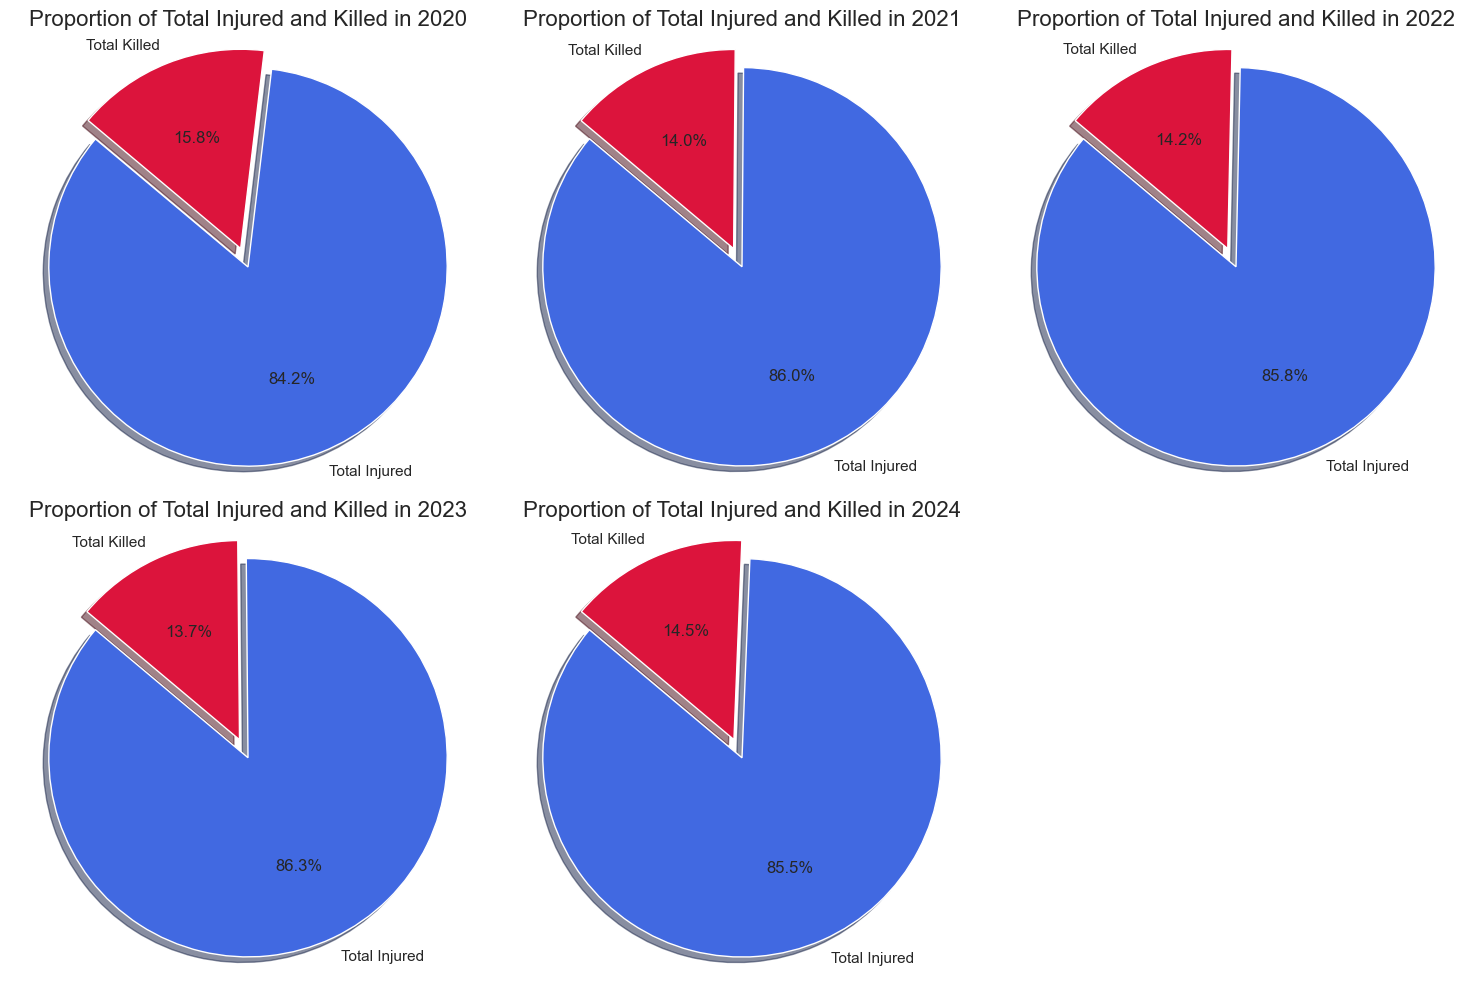

In [76]:
df_grouped = df.groupby('Year').agg({'Num_Injured': 'sum', 'Num_Killed': 'sum'}).reset_index()


fig, axes = plt.subplots(2, 3, figsize=(15, 10))  
axes = axes.flatten()  


for index, row in df_grouped.iterrows():
    total_injured = row['Num_Injured']
    total_killed = row['Num_Killed']
    
    sizes = [total_injured, total_killed]
    labels = ['Total Injured', 'Total Killed']
    colors = ['royalblue', 'crimson']
    explode = (0.1, 0)  

    # Create pie chart in the corresponding subplot
    axes[index].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
                    shadow=True, startangle=140)
    axes[index].set_title(f'Proportion of Total Injured and Killed in {row["Year"]}', fontsize=16)
    axes[index].axis('equal')  
for j in range(index + 1, len(axes)):
    axes[j].axis('off')  

plt.tight_layout()
plt.show()

We can see that total injured always dominates over total killed (we never want to expect the opposite :')

#### Crashes Analysis By State

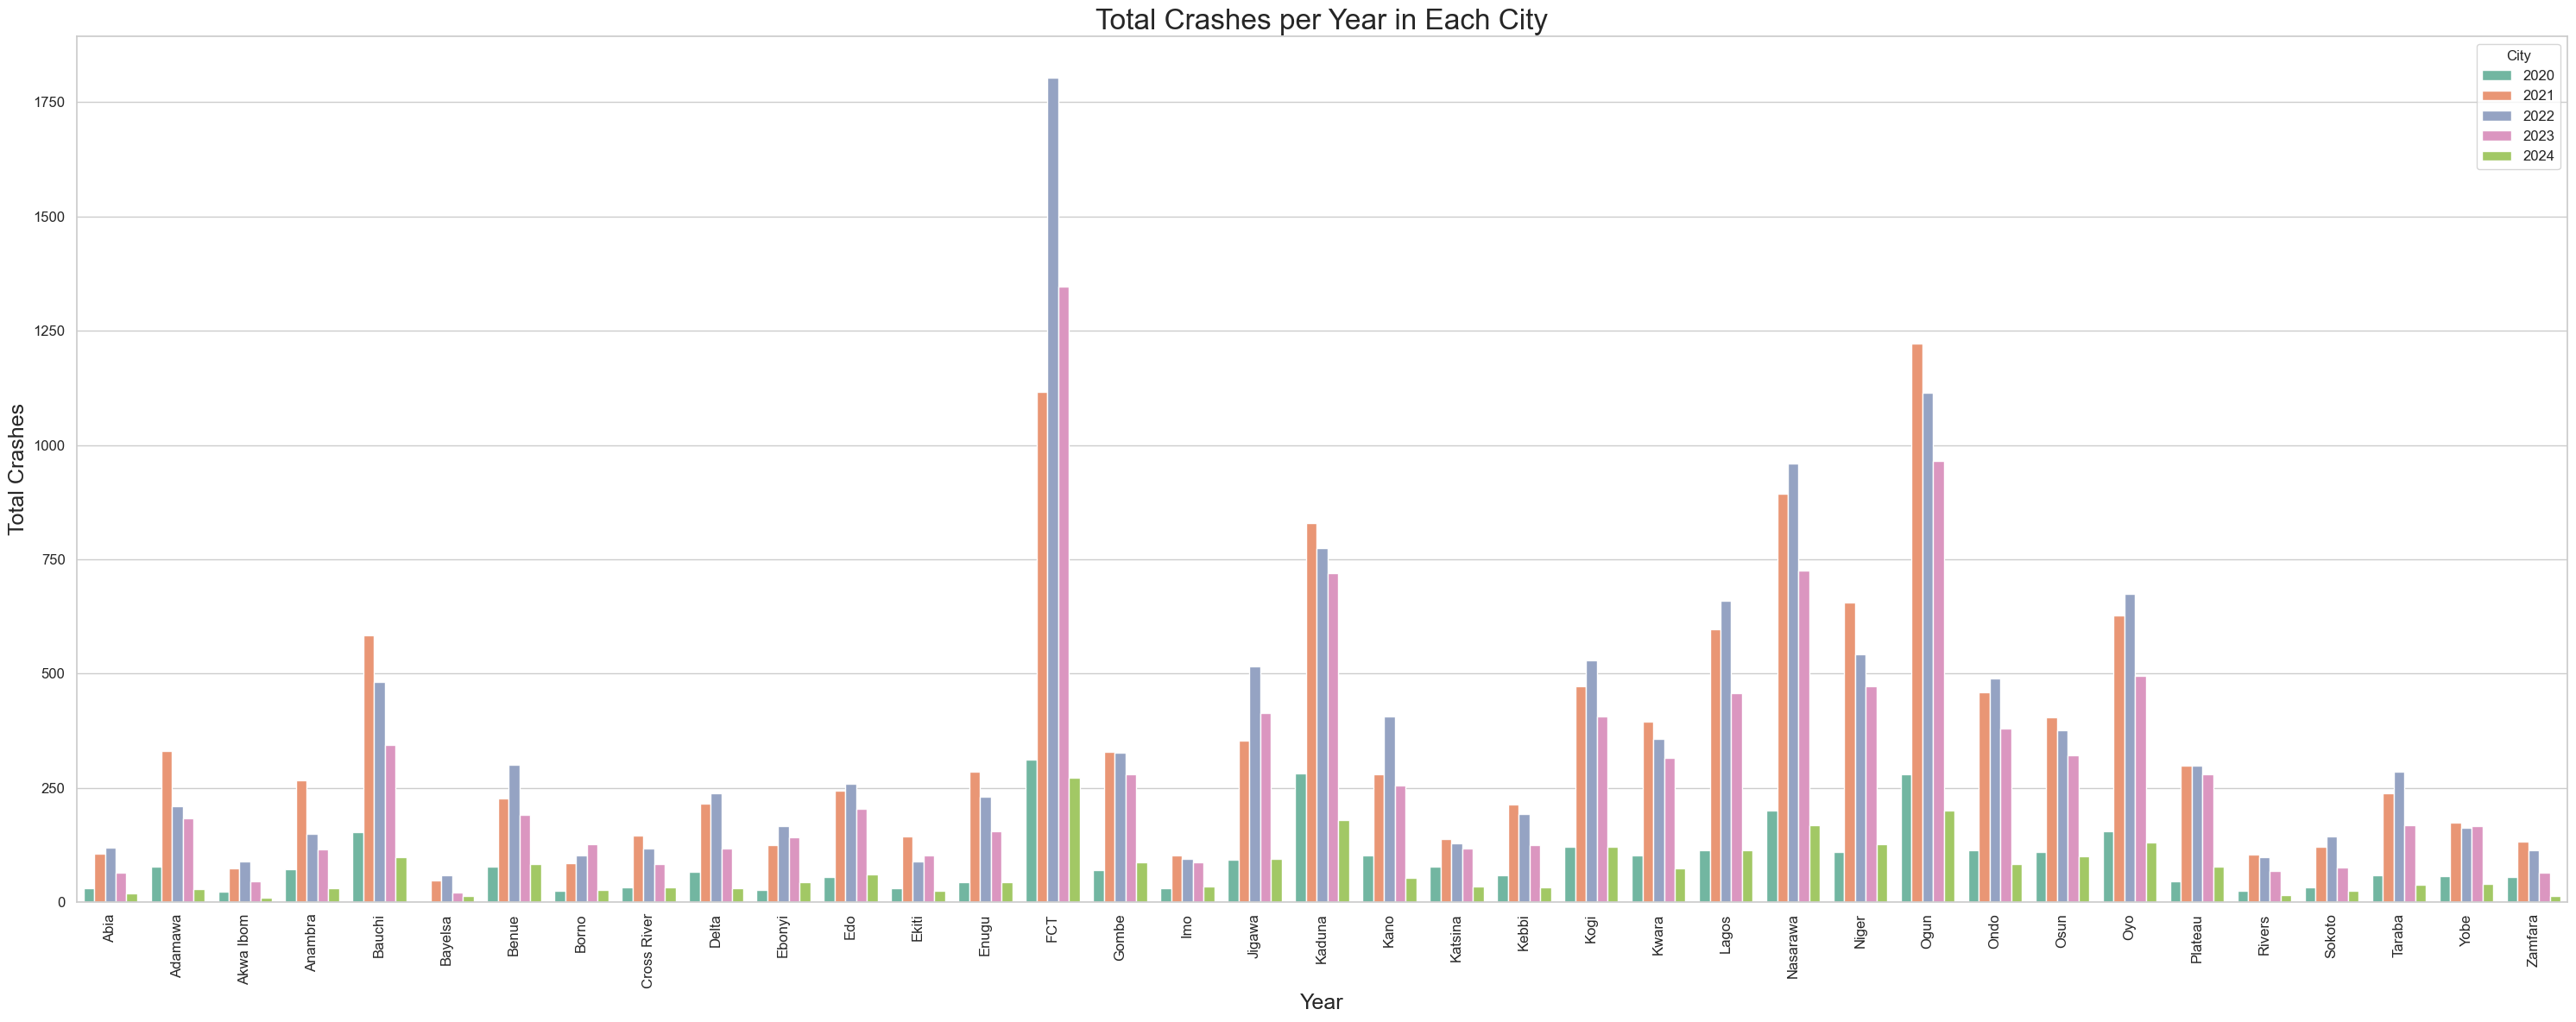

In [77]:
sns.set_style("whitegrid")

df_grouped = df.groupby(['Year', 'State']).agg({'Total_Crashes': 'sum'}).reset_index()

plt.figure(figsize=(30, 12))

sns.barplot(data=df_grouped, x='State', y='Total_Crashes', hue='Year', palette='Set2')

plt.title('Total Crashes per Year in Each City', fontsize=24)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Total Crashes', fontsize=18)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='City', fontsize=12)

plt.tight_layout()
plt.show()

It can be seen that the highest number of accidents occurred in the FCT state in 2022

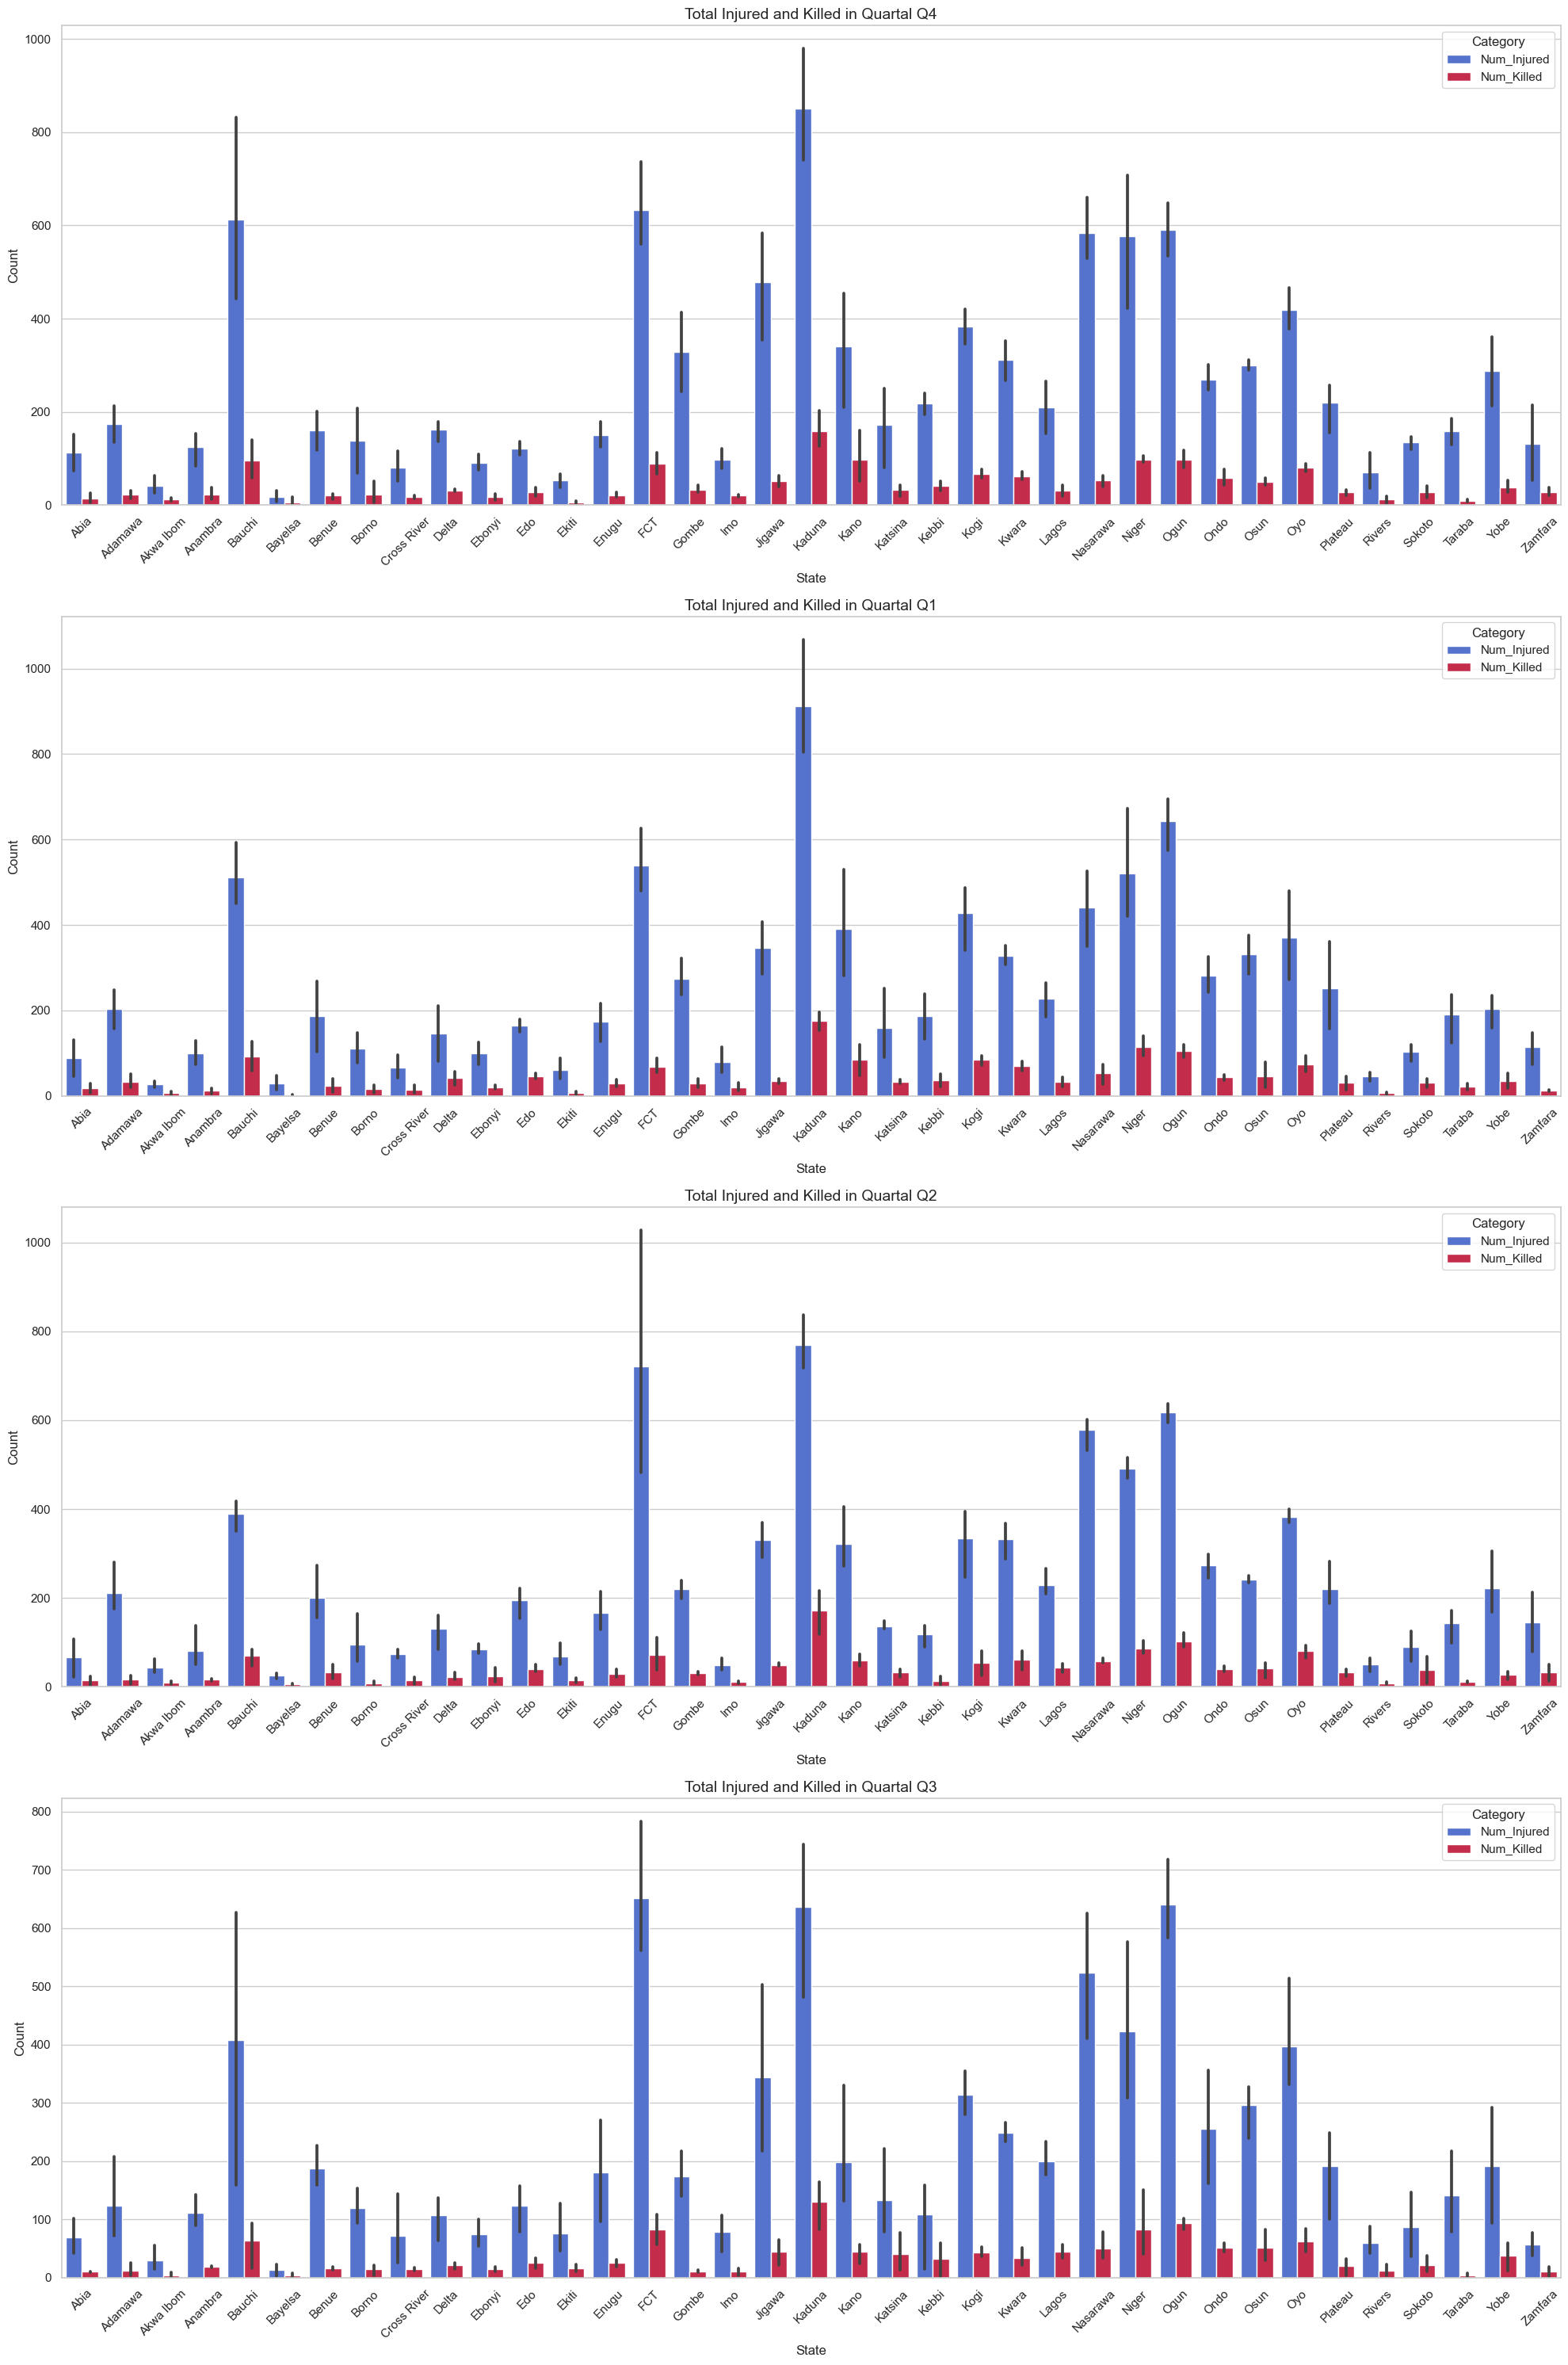

In [78]:

df_grouped = df.groupby(['State', 'Year', 'Quartal']).agg({'Num_Injured': 'sum', 'Num_Killed': 'sum'}).reset_index()

df_melted = df_grouped.melt(id_vars=['State', 'Year', 'Quartal'], value_vars=['Num_Injured', 'Num_Killed'],
                             var_name='Category', value_name='Count')
quarters = df_melted['Quartal'].unique()
fig, axes = plt.subplots(4, 1, figsize=(20, 30))
axes = axes.flatten()

for i, quartal in enumerate(quarters):
    quartal_data = df_melted[df_melted['Quartal'] == quartal]
    sns.barplot(data=quartal_data, x='State', y='Count', hue='Category', palette=['royalblue', 'crimson'], ax=axes[i])
    axes[i].set_title(f'Total Injured and Killed in Quartal {quartal}', fontsize=14)
    axes[i].set_xlabel('State', fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

most incidents result in injuries rather than deaths, with a few states having much higher numbers than others.

#### Crashes Factors Analysis

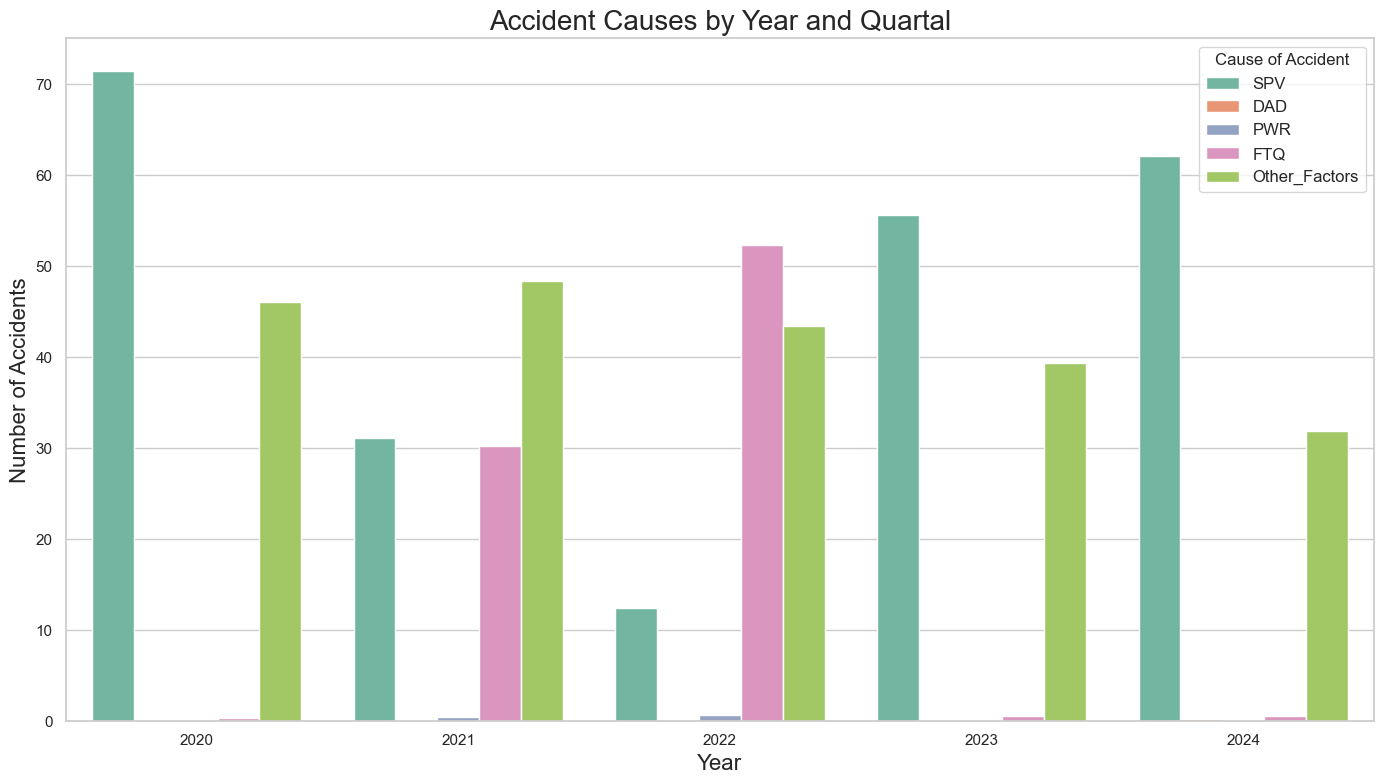

In [79]:
df_melted = df.melt(id_vars=['Year', 'Quartal'], 
                     value_vars=['SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors'], 
                     var_name='Cause', value_name='Count')


sns.set(style='whitegrid')

# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted, x='Year', y='Count', hue='Cause', palette='Set2', ci=None)


plt.title('Accident Causes by Year and Quartal', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Accidents', fontsize=16)
plt.xticks(rotation=0)
plt.legend(title='Cause of Accident', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

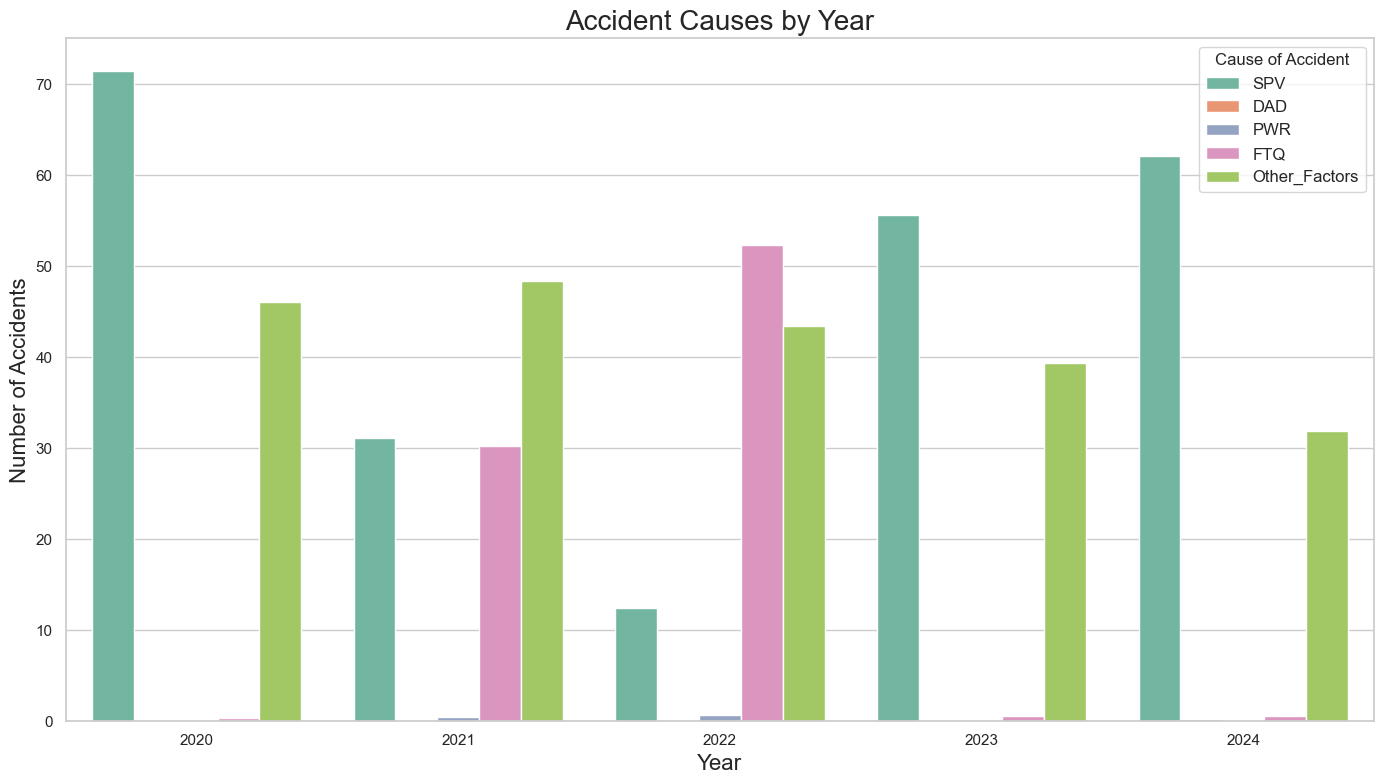

In [80]:
# Melt the DataFrame to long format for easier plotting
df_melted = df.melt(id_vars=['Year', 'Quartal'], 
                     value_vars=['SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors'], 
                     var_name='Cause', value_name='Count')


sns.set(style='whitegrid')


plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted, x='Year', y='Count', hue='Cause', palette='Set2', ci=None)

plt.title('Accident Causes by Year', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Accidents', fontsize=16)
plt.xticks(rotation=0)
plt.legend(title='Cause of Accident', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

- SPV and Other_Factors are the leading contributors to accidents over the years
- FTQ caused very few accidents from 2020 to 2021

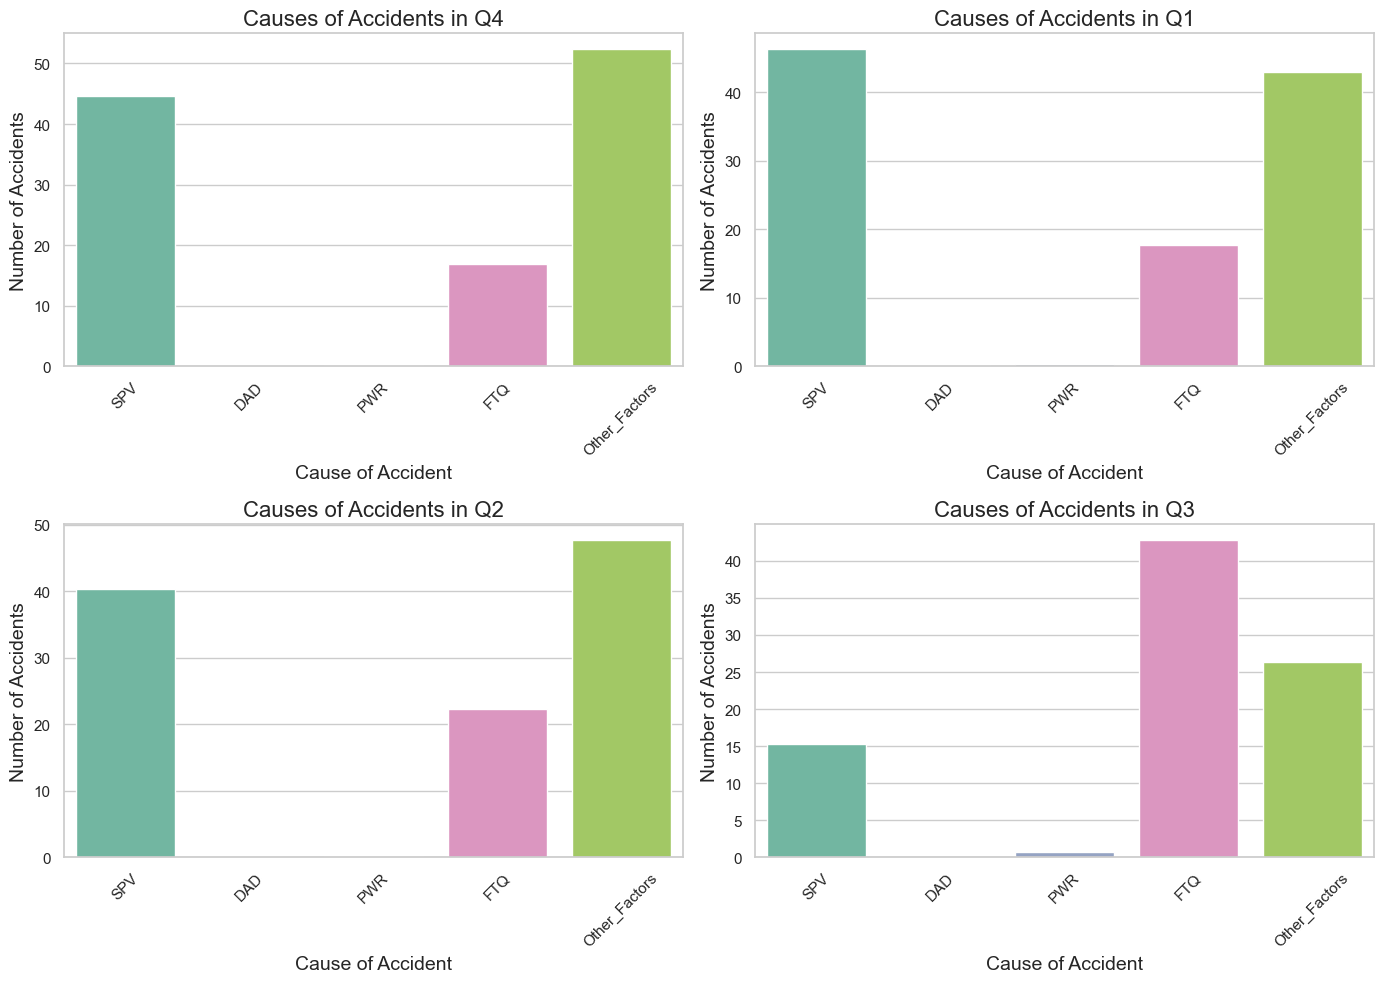

In [81]:
df_melted = df.melt(id_vars=['Year', 'Quartal'], 
                     value_vars=['SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors'], 
                     var_name='Cause', value_name='Count')


sns.set(style='whitegrid')

quartals = df['Quartal'].unique()
n_quartals = len(quartals)


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10)) 
axes = axes.flatten()  


for idx, quartal in enumerate(quartals):
   
    quartal_data = df_melted[df_melted['Quartal'] == quartal]
    
  
    sns.barplot(data=quartal_data, x='Cause', y='Count', ax=axes[idx], palette='Set2', ci=None)
    
    
    axes[idx].set_title(f'Causes of Accidents in {quartal}', fontsize=16)
    axes[idx].set_xlabel('Cause of Accident', fontsize=14)
    axes[idx].set_ylabel('Number of Accidents', fontsize=14)
    axes[idx].tick_params(axis='x', rotation=45)  

# Adjust layout
plt.tight_layout()
plt.show()

- Accidents due to SPV and Other Factors remmain the most consistent causes across all quarters
- FTQ sees a large increase in Q3

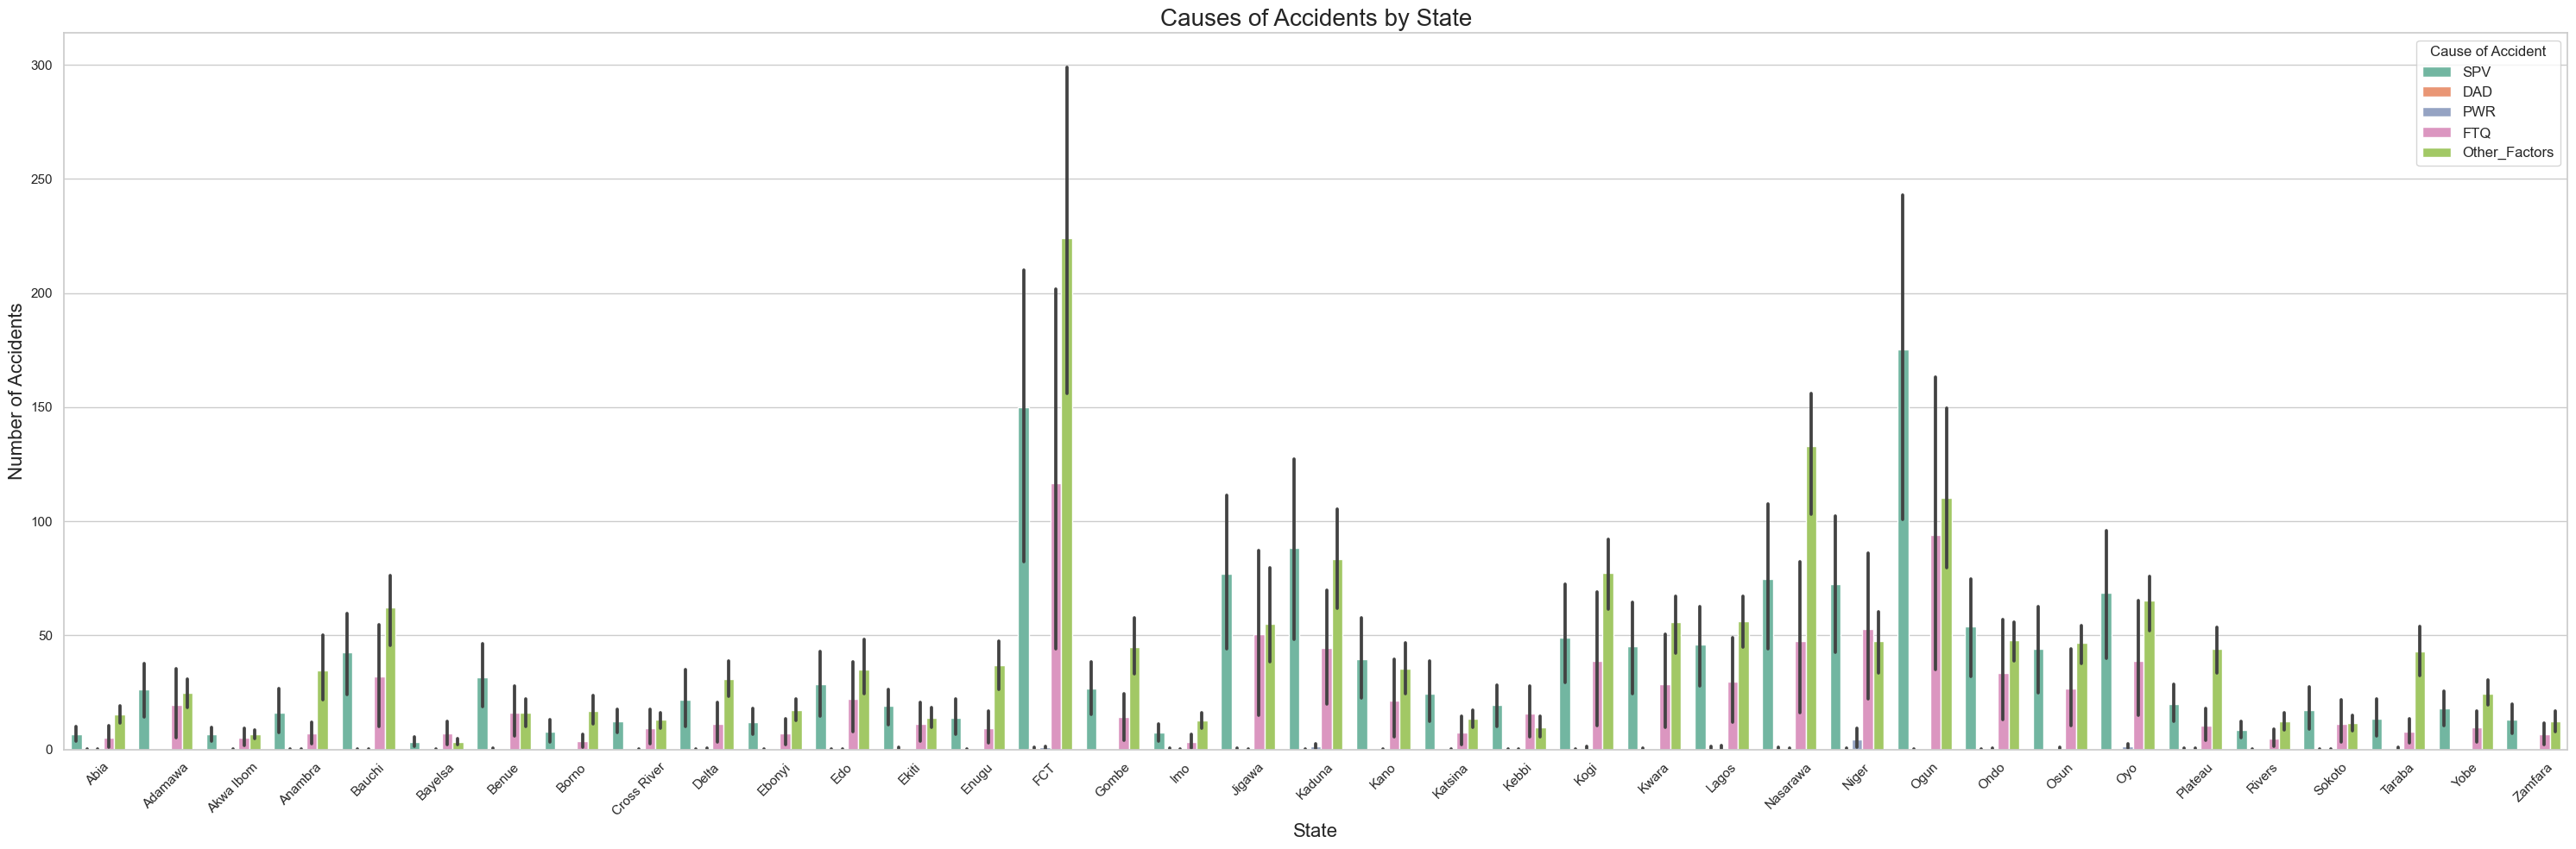

In [82]:
df_melted = df.melt(id_vars=['Year', 'State'], 
                     value_vars=['SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors'], 
                     var_name='Cause', value_name='Count')

sns.set(style='whitegrid')


plt.figure(figsize=(30, 10))
sns.barplot(data=df_melted, x='State', y='Count', hue='Cause', palette='Set2')

# Set titles and labels
plt.title('Causes of Accidents by State', fontsize=20)
plt.xlabel('State', fontsize=16)
plt.ylabel('Number of Accidents', fontsize=16)
plt.xticks(rotation=45)  
plt.legend(title='Cause of Accident', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

Accidents due to SPV and Other Factors are common across most states, with certain states like FCT, Bauchi, and Ogun showing significantly higher numbers compared to others.

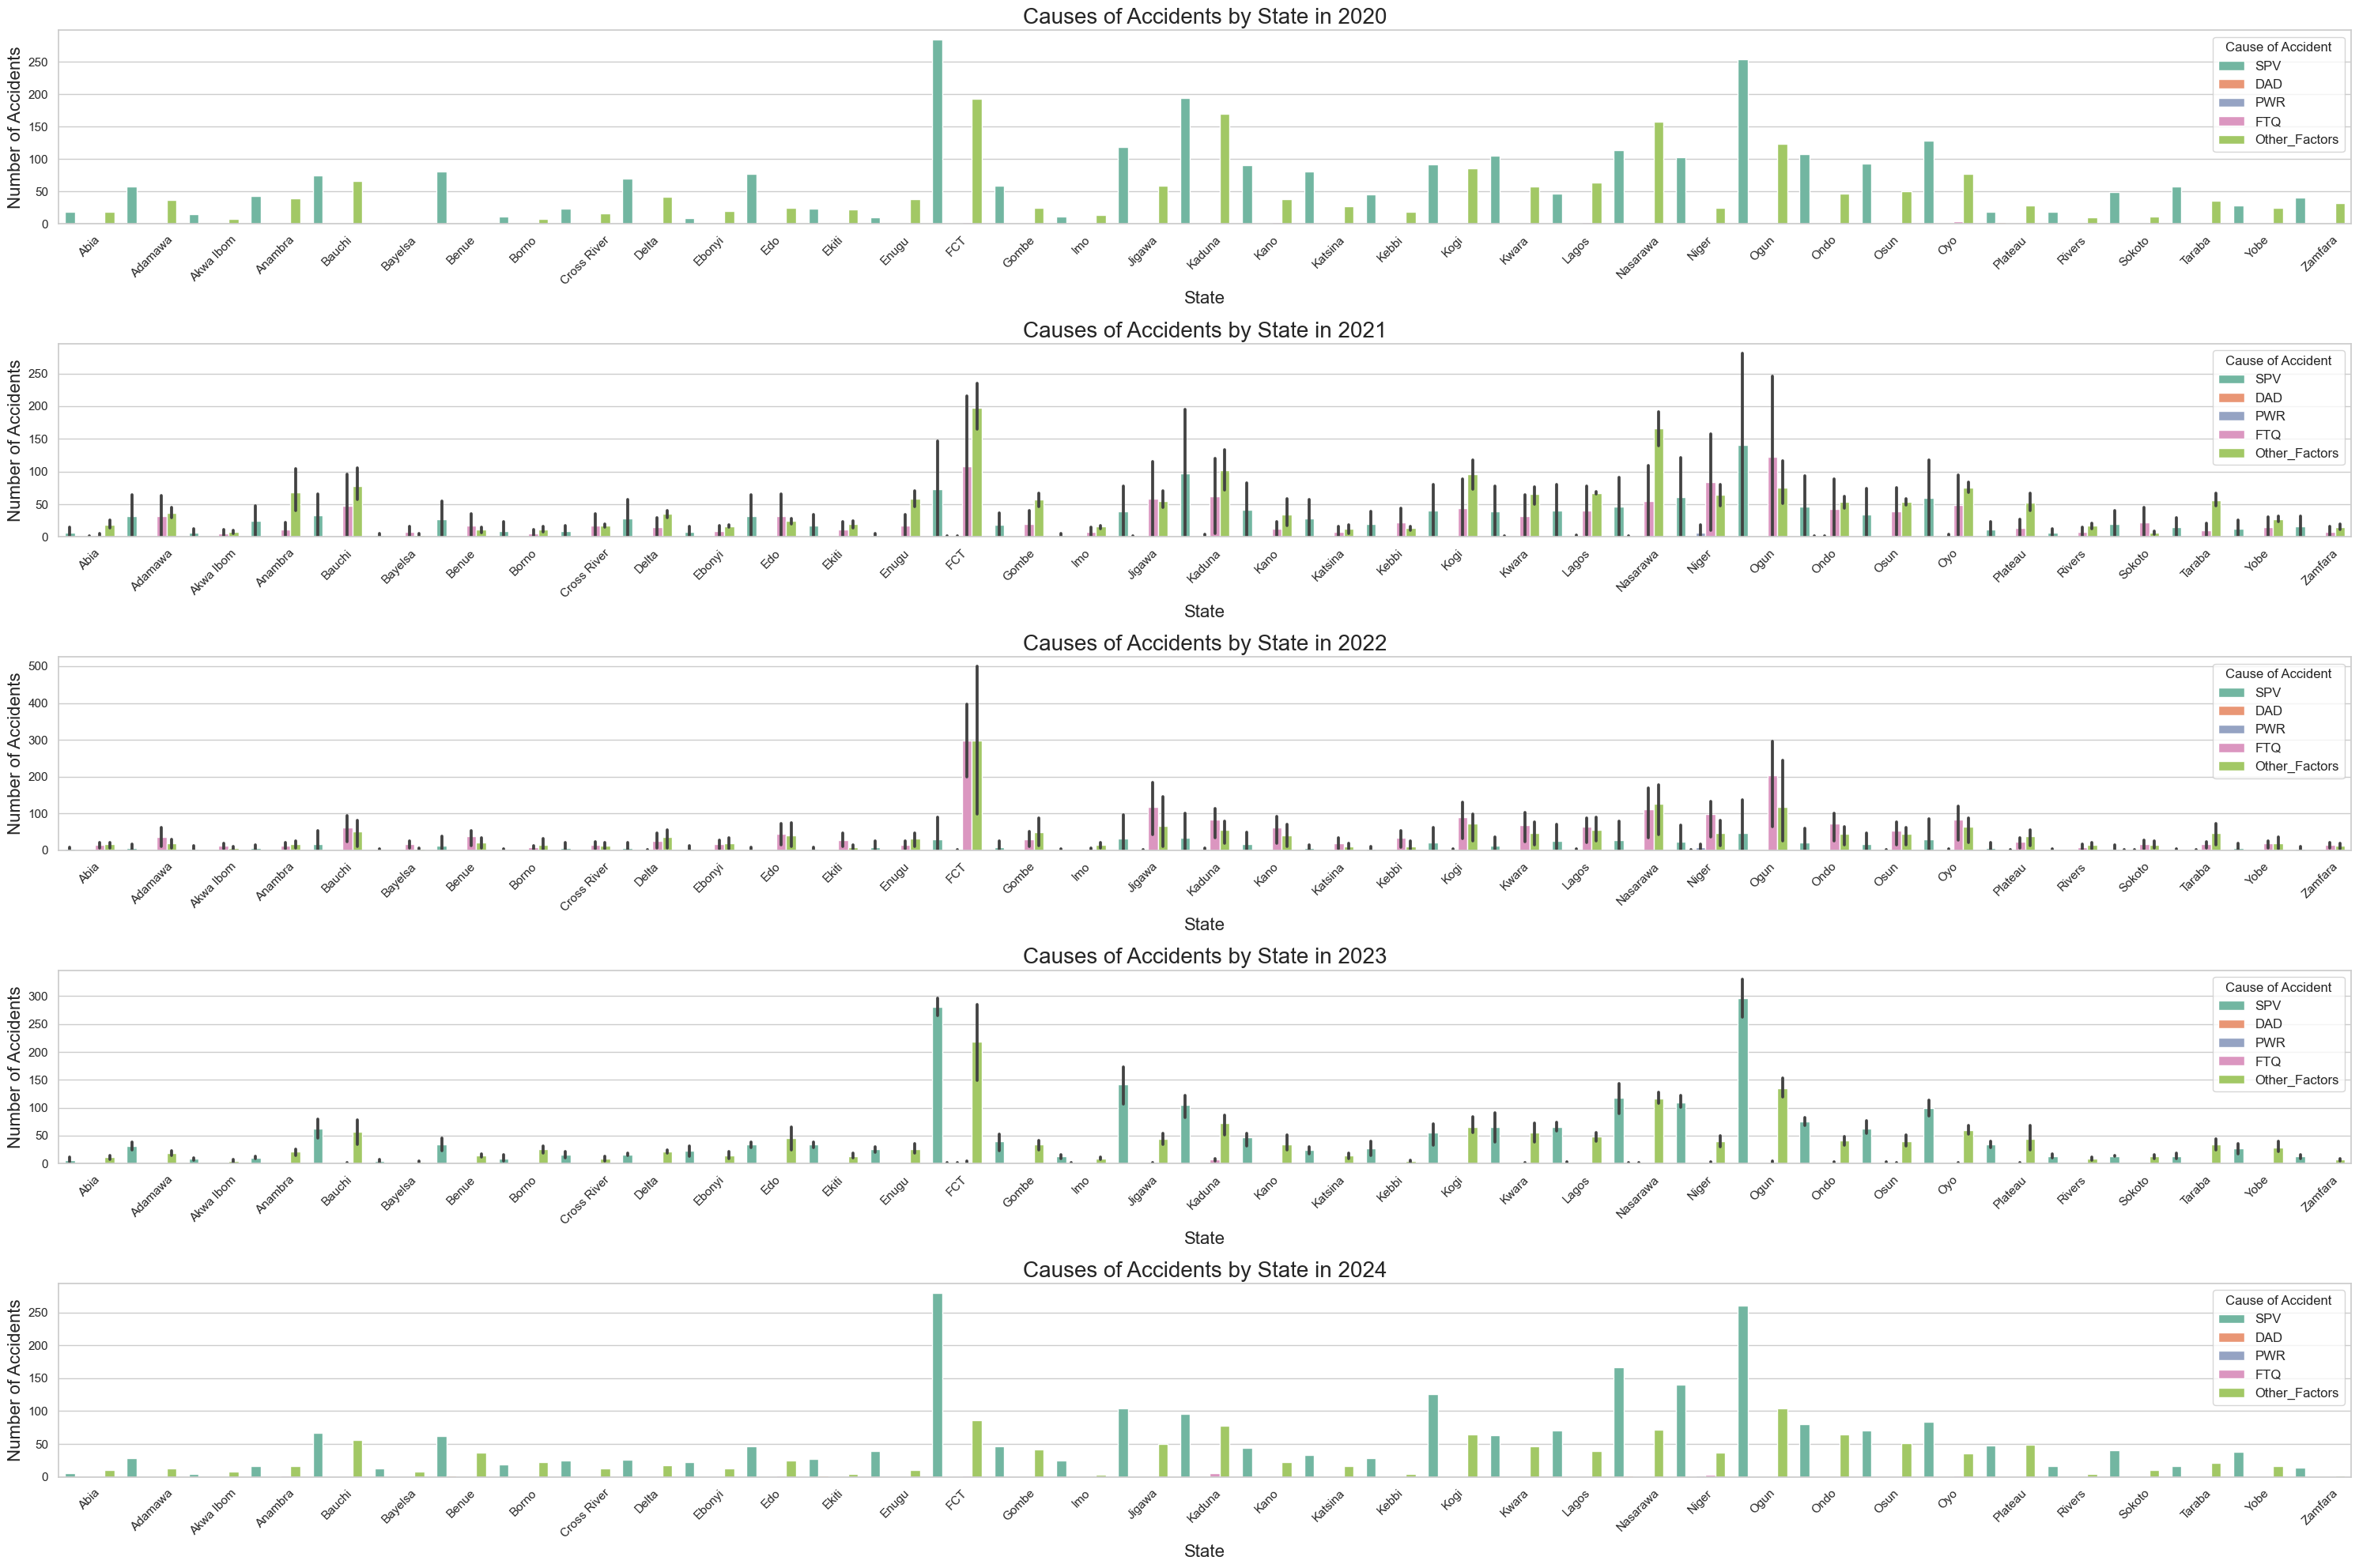

In [83]:
df_melted = df.melt(id_vars=['Year', 'State'], 
                     value_vars=['SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors'], 
                     var_name='Cause', value_name='Count')


sns.set(style='whitegrid')

unique_years = df['Year'].unique()
num_years = len(unique_years)

plt.figure(figsize=(30, 4 * num_years))  

for i, year in enumerate(unique_years):
    plt.subplot(num_years, 1, i + 1)  
    year_data = df_melted[df_melted['Year'] == year]
    
    sns.barplot(data=year_data, x='State', y='Count', hue='Cause', palette='Set2')
    
    plt.title(f'Causes of Accidents by State in {year}', fontsize=20)
    plt.xlabel('State', fontsize=16)
    plt.ylabel('Number of Accidents', fontsize=16)
    plt.xticks(rotation=45)  
    plt.legend(title='Cause of Accident', fontsize=12)

# Adjust layout
plt.tight_layout()

plt.show()

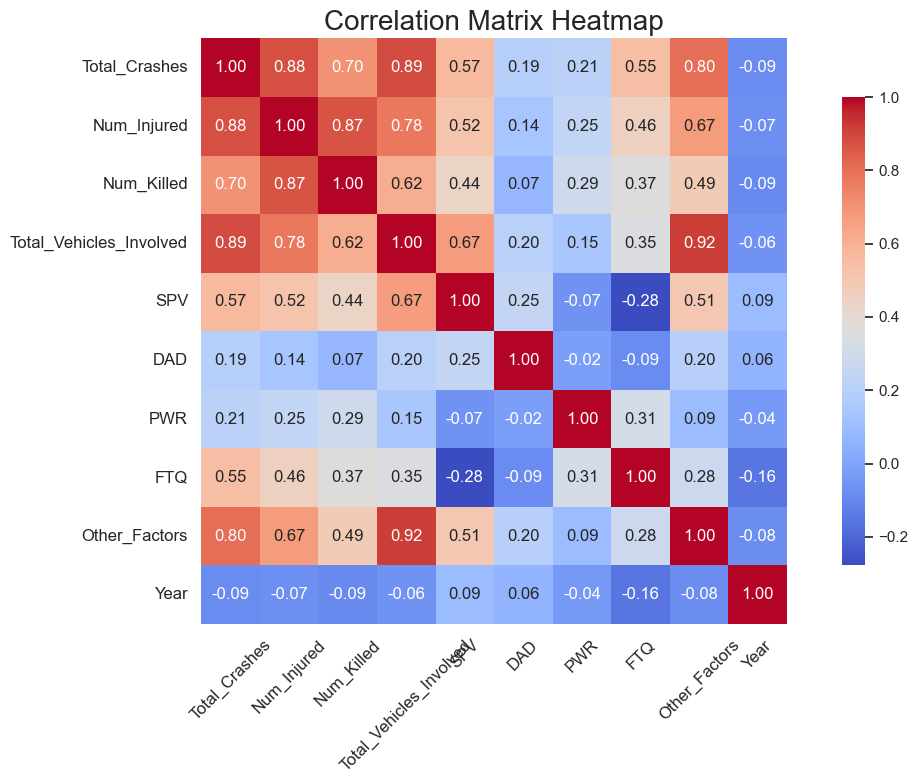

In [84]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set the style for the plot
sns.set(style='whitegrid')

# Create a heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Title and labels
plt.title('Correlation Matrix Heatmap', fontsize=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

same as the previous plot it can be seen that in 2020 and 2024 there are very few accidents caused by FTQ, DAD and PWR

## Conclusion:
- The dataset covers Nigerian traffic crashes from 2020 to 2024, showing trends in crashes, injuries, deaths, and contributing factors like speed violations and weather.

- Negative values in the Other_Factors column were corrected, improving data accuracy.

-  Crashes peaked in Q4 each year, with a noticeable rise from 2020 to 2022, and a decline in 2023 and early 2024.

-  Most crashes resulted in injuries, with around 90% involving injuries and only a small percentage leading to fatalities.

- States like FCT, Bauchi, and Ogun had higher accident rates compared to others, highlighting regional risks.

-  Speed violations and other factors were the main causes of crashes, with fatigue (FTQ) increasing in some years.


- Accidents are more frequent in Q4 and certain states.
- Speed violations are a major cause of accidents.
- Most accidents result in injuries, not fatalities.